### Nondispersive dielectric

In [9]:
%load_ext autoreload
%autoreload 2

%pylab inline

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'spacetime')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

plt.rc('text', usetex=True)
#plt.rc('font', family='serif', size=18)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)


show_axis = False



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


d_k: 0.845236523481
d_wc: 1.81261557407


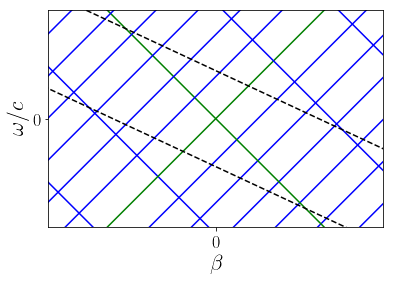

interleaved_range:  [0, 1, -1, 2, -2, 3, -3, 4, -4, 5, -5, 6, -6, 7, -7, 8, -8, 9, -9, 10, -10, 11, -11, 12, -12, 13, -13, 14, -14, 15, -15, 16, -16, 17, -17, 18, -18, 19, -19, 20, -20]


In [12]:

import numpy as np
from scipy import constants

c = constants.c
n = 1#3.4
N = 400
k_max = 5.0
w_max = k_max/n*c
k_arr = np.linspace(-10.0*k_max, 10.0*k_max, N)
w_arr = k_arr/n*c

d_kw = 2.0
phi =  65.0/180.0*np.pi
d_k = d_kw*np.cos(phi)
d_wc = d_kw*np.sin(phi)
#if d_wc<0.0:
#    d_wc *= -1.0
#    d_k *= -1.0

d_w = d_wc*c
n_mode = 20

print('d_k:', d_k)
print('d_wc:', d_wc)

a = 2.0*np.pi/d_k

for i in range(-n_mode, n_mode+1):
    color = 'b'
    if i==0:
        color = 'g'
    plot(k_arr+i*d_k, (w_arr+i*d_w)/c, color)
    plot(k_arr+i*d_k, (-w_arr+i*d_w)/c, color)

if show_axis:
    plot([-k_max, k_max], [0, 0], 'k-', lw=0.5)
    plot([0, 0], [-w_max, w_max], 'k-', lw=0.5)
#plot(10*np.array([-d_k, d_k]), 10*np.array([-d_w, d_w])/c, color='k', linestyle='-', linewidth=2)

bz = np.array([0.5*d_k, 0.5*d_w/c])
bz_n = 10.0*np.array([-bz[1], bz[0]])  ##normal
plot([(bz-bz_n)[0], (bz+bz_n)[0]], [(bz-bz_n)[1], (bz+bz_n)[1]], 'k--')
plot([(-bz-bz_n)[0], (-bz+bz_n)[0]], [(-bz-bz_n)[1], (-bz+bz_n)[1]], 'k--')
ylabel(r'$\omega /c$', fontsize=22)
xlabel(r'$\beta$', fontsize=22)
xticks([0])
yticks([0])
axis('equal')
xlim(-k_max/2, k_max/2)
ylim(-w_max/c/2, w_max/c/2)
savefig(os.path.join(dir_name, 'nondispersive-epsr' + file_ext), bbox_inches='tight', pad_inches=0.2)

    
if 'w_i' in globals():
    axhline(w_i, color='g', linestyle='-.')
    savefig(os.path.join(dir_name, 'nondispersive-epsr-wi' + file_ext), bbox_inches='tight', pad_inches=0.2)
    print('d_k/k_i:', d_k/(w_i*n))
    print('d_wc/omega_i:', d_wc/w_i)

if 'eig_points_k' in globals():
    #plot(np.real(eig_points_k), np.real(eig_points_w), 'ro', lw=0.1)
    plot(np.real(eig_points_k_m), np.real(eig_points_w_m), 'yo', lw=0.1, markersize=5)
    plot(np.real(eig_points_k_p), np.real(eig_points_w_p), 'ro', lw=0.1, markersize=3)
    savefig(os.path.join(dir_name, 'nondispersive-epsr-modes' + file_ext), bbox_inches='tight', pad_inches=0.2)

#plot(np.real(eig_points_kp[:,0]), np.real(eig_points_wp[:,0]), 'go')
show()


interleaved_range = [0]
interleaved_range.extend([val for pair in zip(np.arange(1, n_mode+1), -np.arange(1, n_mode+1)) for val in pair])
print('interleaved_range: ', interleaved_range)


import matplotlib.animation as animation

animate_periodic = False
ah_len = 0.15*np.sqrt(np.abs(d_k)**2 + np.abs(d_w/c)**2)
ah_width = 0.2*ah_len
zero_drawn = False
if animate_periodic:
    figsize(5, 5)

    def animate_per(_i_):
        global zero_drawn
        i = interleaved_range[_i_]
        lw = 2
        _color_ = 'b'#list(colors_list.keys())[i+n_mode]
        if i==0:
            lw = 2
            _color_ = 'g'
        
        plot(k_arr+i*d_k, (w_arr+i*d_w)/c, _color_, lw=lw)
        plot(k_arr+i*d_k, (-w_arr+i*d_w)/c, _color_, lw=lw)
        
        
        if i==1:
            plot([(bz-bz_n)[0], (bz+bz_n)[0]], [(bz-bz_n)[1], (bz+bz_n)[1]], 'k--')
            plot([(-bz-bz_n)[0], (-bz+bz_n)[0]], [(-bz-bz_n)[1], (-bz+bz_n)[1]], 'k--')
        if i==0:
            gca().arrow(-k_max, 0, 2*k_max, 0, head_width=2.5*ah_width, head_length=2*ah_len, fc='k', ec='k', length_includes_head=True)
        
        
        if i>0:
            gca().arrow((i-1)*d_k, (i-1)*d_w/c, d_k, d_w/c, head_width=ah_width, head_length=ah_len, fc='r', ec='r', length_includes_head=True)
        elif i<0:
            gca().arrow((i+1)*d_k, (i+1)*d_w/c, -d_k, -d_w/c, head_width=ah_width, head_length=ah_len, fc='r', ec='r', length_includes_head=True)
        

        ylabel(r'$\omega$', fontsize=26)
        xlabel(r'$\beta$', fontsize=26)
        #axis('equal')
        xticks([0])
        yticks([0])
        xlim(-k_max, k_max)
        ylim(-w_max/c, w_max/c)
        
        if abs(i)<3:
            if (i==0 and not zero_drawn) or i!=0:
                savefig(os.path.join(dir_name, 'anim-{}'.format(i) + file_ext), bbox_inches='tight', pad_inches=0.2)
                zero_drawn = True

    fig = plt.figure()
    axes = plt.gca()
    anim = animation.FuncAnimation(fig, animate_per, frames=len(interleaved_range), interval=1, repeat=False)
    anim.save(os.path.join(dir_name, 'anim.gif'), writer="imagemagick", fps=1, dpi=200)

show()


animate_mod_velocity = False
if animate_mod_velocity:
    figsize(5, 5)

    phi_arr = np.linspace(0.0, 180.0, 200)/180.0*np.pi
    
    def animate_modvel(i):
        plt.clf()
        _phi_ = phi_arr[i]
        _d_k_ = d_kw*np.cos(_phi_)
        _d_wc_ = d_kw*np.sin(_phi_)
        _d_w_ = _d_wc_*c

        for i in interleaved_range:
            _color_, lw = 'b', 1
            if i==0:
                _color_, lw = 'g', 1
            plot(k_arr+i*_d_k_, (w_arr+i*_d_w_)/c, _color_, lw=lw)
            plot(k_arr+i*_d_k_, (-w_arr+i*_d_w_)/c, _color_, lw=lw)

        _bz_ = np.array([0.5*_d_k_, 0.5*_d_w_/c])
        _bz_n_ = 10.0*np.array([-_bz_[1], _bz_[0]])  ##normal

        plot([(_bz_-_bz_n_)[0], (_bz_+_bz_n_)[0]], [(_bz_-_bz_n_)[1], (_bz_+_bz_n_)[1]], 'k--')
        plot([(-_bz_-_bz_n_)[0], (-_bz_+_bz_n_)[0]], [(-_bz_-_bz_n_)[1], (-_bz_+_bz_n_)[1]], 'k--')
        gca().arrow(-k_max, 0, 2*k_max, 0, head_width=2.5*ah_width, head_length=2*ah_len, fc='k', ec='k', length_includes_head=True)
        
        gca().arrow(0, 0, _d_k_, _d_w_/c, head_width=ah_width, head_length=ah_len, fc='r', ec='r', length_includes_head=True)

        ylabel(r'$\omega$', fontsize=26)
        xlabel(r'$\beta$', fontsize=26)
        #axis('equal')
        xticks([0])
        yticks([0])
        xlim(-k_max, k_max)
        ylim(-w_max/c, w_max/c)
        
    fig = plt.figure()
    axes = plt.gca()
    anim = animation.FuncAnimation(fig, animate_modvel, frames=len(phi_arr), interval=1, repeat=False)
    anim.save(os.path.join(dir_name, 'anim-modvel.mp4'), writer="ffmpeg", fps=10, dpi=200)

show()

        

### Nondispersive ST dielectric - numerical 

In [26]:

from sympy import Symbol, symbols, Derivative, latex, exp, I, solve, lambdify, cos, sin
from IPython.display import Math, display

from Electromagnetics.FourierBlochND import *

t, z = symbols('t z')
E = symbols('E')
omega, k, c = symbols(r'\omega k c')
eps_r, M = symbols(r'\epsilon_r M')
omega_m, k_m = symbols(r'\omega_m k_m')
mu_0, eps_0 = symbols(r'\mu_0 \epsilon_0', real=True)
n_0 = symbols('n_0')
phi_s = symbols(r'\phi')

EQ = Derivative(E, z, 2) - mu_0*eps_0*Derivative(eps_r*E, t, 2)

display(Math('EQ = ' + latex(EQ)))

BlochFact = exp(I*omega*t-I*k*z)
EQ = EQ.subs(E, E*BlochFact)
display(Math('EQ = ' + latex(EQ)))

harmonic = exp(n_0*I*(omega_m*t-k_m*z))

pde_FB = PDEFourierSeriesND(EQ, [E, eps_r], n_dim=1, harmonic=harmonic, usexyz=False)

EQ_harm = pde_FB.putSums()#.doit()
display(Math('EQ_\\text{harm} = ' + latex(EQ_harm)))

EQ_harm = EQ_harm.doit()
display(Math('EQ_\\text{harm} = ' + latex(EQ_harm)))

EQ_harm = pde_FB.applyConvolutions(EQ_harm)
display(Math('EQ_\\text{harm} = ' + latex(EQ_harm)))

EQ_harm = (pde_FB.applyOrthogonalities(EQ_harm)/BlochFact).simplify()
display(Math('EQ_\\text{harm} = ' + latex(EQ_harm)))

E_tilde, eps_r_tilde = pde_FB.varsHarm
display(Math(latex(E_tilde) + '~~~~' + latex(eps_r_tilde)))

Omega, K = symbols(r'\Omega K')

K_sub = k*k_m + omega*omega_m
Omega_sub = -k*omega_m + omega*k_m
display(Math('K = ' + latex(K_sub)))
display(Math(r'\Omega = ' + latex(Omega_sub)))
#phi_s_sub = np.arccos(d_k/(d_k**2 + d_wc**2))

k_omega_sub = solve([K_sub-K, Omega_sub-Omega], [k, omega])
k_sub = k_omega_sub[k]
omega_sub = k_omega_sub[omega]


display(Math('k = ' + latex(k_sub)))
display(Math(r'\omega = ' + latex(omega_sub)))


EQ_harm_kw = EQ_harm
EQ_harm_KW = EQ_harm.subs([(k, k_sub), (omega, omega_sub)])
display(Math('EQ_\\text{harm} = ' + latex(EQ_harm_KW)))

EQ_harm_kw = EQ_harm_kw.subs([(eps_0, 1), (mu_0, 1), (omega_m, d_wc), (k_m, d_k)])
EQ_harm_KW = EQ_harm_KW.subs([(eps_0, 1), (mu_0, 1), (omega_m, d_wc), (k_m, d_k)])
omega_sub_fun = lambdify((K, Omega), omega_sub.subs([(omega_m, d_wc), (k_m, d_k)]), modules='numpy')
k_sub_fun = lambdify((K, Omega), k_sub.subs([(omega_m, d_wc), (k_m, d_k)]), modules='numpy')
Omega_sub_fun = lambdify((k, omega), Omega_sub.subs([(omega_m, d_wc), (k_m, d_k)]), modules='numpy')
K_sub_fun = lambdify((k, omega), K_sub.subs([(omega_m, d_wc), (k_m, d_k)]), modules='numpy')

n_sym, m = symbols('n m')

## c=1 ---> w, w_m normalized to c
eq_KW = (k-m*k_m) - (omega-m*omega_m)*n_sym
display(Math(r'k(\omega) = ' + latex(eq_KW)))
eq_KW = eq_KW.subs([(k, k_sub), (omega, omega_sub)])
display(Math(r'K(\Omega) = ' + latex(eq_KW)))
Omega__K_p = solve(eq_KW, Omega)[0]
K__Omega_p = solve(eq_KW, K)[0]
display(Math(r'\Omega(K)^+ = ' + latex(Omega__K_p)))
display(Math(r'K(\Omega)^+ = ' + latex(K__Omega_p)))

eq_KW = (k-m*k_m) + (omega-m*omega_m)*n_sym
display(Math(r'k(\omega) = ' + latex(eq_KW)))
eq_KW = eq_KW.subs([(k, k_sub), (omega, omega_sub)])
display(Math(r'K(\Omega) = ' + latex(eq_KW)))
Omega__K_m = solve(eq_KW, Omega)[0]
K__Omega_m = solve(eq_KW, K)[0]
display(Math(r'\Omega(K)^- = ' + latex(Omega__K_m)))
display(Math(r'K(\Omega)^- = ' + latex(K__Omega_m)))

Omega__K_p_fun = lambdify((K, m), Omega__K_p.subs([(omega_m, d_wc), (k_m, d_k), (n_sym, n)]), modules='numpy')
Omega__K_m_fun = lambdify((K, m), Omega__K_m.subs([(omega_m, d_wc), (k_m, d_k), (n_sym, n)]), modules='numpy')
K__Omega_p_fun = lambdify((Omega, m), K__Omega_p.subs([(omega_m, d_wc), (k_m, d_k), (n_sym, n)]), modules='numpy')
K__Omega_m_fun = lambdify((Omega, m), K__Omega_m.subs([(omega_m, d_wc), (k_m, d_k), (n_sym, n)]), modules='numpy')

eq_kw = (k-m*k_m) - (omega-m*omega_m)*n_sym
omega__k_p = solve(eq_kw, omega)[0]
k__omega_p = solve(eq_kw, k)[0]
display(Math(r'\omega(k)^+ = ' + latex(omega__k_p)))
display(Math(r'k(\omega)^+ = ' + latex(k__omega_p)))

eq_kw = (k-m*k_m) + (omega-m*omega_m)*n_sym
omega__k_m = solve(eq_kw, omega)[0]
k__omega_m = solve(eq_kw, k)[0]
display(Math(r'\omega(k)^- = ' + latex(omega__k_m)))
display(Math(r'k(\omega)^- = ' + latex(k__omega_m)))

omega__k_p_fun = lambdify((k, m), omega__k_p.subs([(omega_m, d_wc), (k_m, d_k), (n_sym, n)]), modules='numpy')
omega__k_m_fun = lambdify((k, m), omega__k_m.subs([(omega_m, d_wc), (k_m, d_k), (n_sym, n)]), modules='numpy')
k__omega_p_fun = lambdify((omega, m), k__omega_p.subs([(omega_m, d_wc), (k_m, d_k), (n_sym, n)]), modules='numpy')
k__omega_m_fun = lambdify((omega, m), k__omega_m.subs([(omega_m, d_wc), (k_m, d_k), (n_sym, n)]), modules='numpy')

m0, m1 = symbols('m_0 m_1')
k_m0m1 = solve((omega__k_p.subs(m, m0)-omega__k_m.subs(m, m1)), k)[0]
display(Math(r'k_{m0m1} = ' + latex(k_m0m1)))
k_m0m1_fun = lambdify((m0, m1), k_m0m1.subs([(omega_m, d_wc), (k_m, d_k), (n_sym, n)]), modules='numpy')

## Brillouine zone intersections
#p1 = [d_k, d_w/c]/2, p2= p1 + [-p1_y, p1_x]
eq_bz_m = (k+k_m/2)/omega_m + (omega+omega_m/2)/k_m
display(Math(r'eq_{bz}^- = ' + latex(eq_bz_m)))

k_intsect_bzm_p = solve(omega__k_p - solve(eq_bz_m, omega)[0], k)[0]
display(Math(r'intersection~~k_{bz^-}^+ = ' + latex(k_intsect_bzm_p)))
k_intsect_bzm_m = solve(omega__k_m - solve(eq_bz_m, omega)[0], k)[0]
display(Math(r'intersection~~k_{bz^-}^- = ' + latex(k_intsect_bzm_m)))

k_intsect_bzm_p_fun = lambdify(m, k_intsect_bzm_p.subs([(omega_m, d_wc), (k_m, d_k), (n_sym, n)]), modules='numpy')
k_intsect_bzm_m_fun = lambdify(m, k_intsect_bzm_m.subs([(omega_m, d_wc), (k_m, d_k), (n_sym, n)]), modules='numpy')

print('k_intsect_bzm_p(m=0)', k_intsect_bzm_p_fun(0))
print('k_intsect_bzm_m(m=0)', k_intsect_bzm_m_fun(0))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

harmonic: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

k_intsect_bzm_p(m=0) -1.01099326867919
k_intsect_bzm_m(m=0) -0.990436950055004


### Dispersion curves

In [24]:
### set K  get Omega

solver = 'hybr'
maxiter = 4000
maxfev = 4000
tol = 1.0e-13
handle_overflow = False
tol_relative = True


Ns = [32]
#print(d_wc)

def eps_r_fun(x):
    z_ = x[0]
    return n**2*(1.0+0.5*np.cos(d_k*z_))


eps_r_harm_vec = pde_FB.getFourierCoeffs(eps_r_fun, [0.0], [(2.0*np.pi)/d_k], Ns)
#plot(np.abs(eps_r_harm_vec))

n_K = 100 #even
K_i_arr = np.linspace(-1.0, 1.0, n_K)*np.sqrt(d_k**2 + d_wc**2)

_N_pp = 5

eig_points_kp = np.zeros((2*_N_pp+1, n_K), dtype=complex)
eig_points_wp = np.zeros((2*_N_pp+1, n_K), dtype=complex)
eig_points_km = np.zeros((2*_N_pp+1, n_K), dtype=complex)
eig_points_wm = np.zeros((2*_N_pp+1, n_K), dtype=complex)


ind_p_now, ind_m_now = [None]*(2*_N_pp+1), [None]*(2*_N_pp+1)
p_porm_now, m_porm_now = [None]*(2*_N_pp+1), [None]*(2*_N_pp+1)
k_p_now, k_m_now = [None]*(2*_N_pp+1), [None]*(2*_N_pp+1)
ind_p_next, ind_m_next = [None]*(2*_N_pp+1), [None]*(2*_N_pp+1)
p_porm_next, m_porm_next = [None]*(2*_N_pp+1), [None]*(2*_N_pp+1)
k_p_next, k_m_next = [None]*(2*_N_pp+1), [None]*(2*_N_pp+1)
for j in range(-_N_pp, _N_pp+1):
    k_j_bz = k_intsect_bzm_p_fun(j)
    ind_p_now[j+_N_pp] = j
    p_porm_now[j+_N_pp] = '+'
    ind_p_next[j+_N_pp] = None
    
    for i in range(-100, 100):
        if k_m0m1_fun(j, i)<=k_j_bz<k_m0m1_fun(j, i+1):
            ind_p_next[j+_N_pp] = i+1
            break
    
    p_porm_next[j+_N_pp] = '-'
    k_p_next[j+_N_pp] = k_m0m1_fun(ind_p_now[j+_N_pp], ind_p_next[j+_N_pp])
    k_p_now[j+_N_pp] = k_m0m1_fun(ind_p_now[j+_N_pp], ind_p_next[j+_N_pp]-1)
    #print(j, 'k_j_bz:', k_j_bz, 'ind_p_now:', ind_p_now[j+_N_pp], 'ind_p_next:', ind_p_next[j+_N_pp], 'k_p_next:', k_p_next[j+_N_pp])

for j in range(-_N_pp, _N_pp+1):
    k_j_bz = k_intsect_bzm_m_fun(j)
    ind_m_now[j+_N_pp] = j
    m_porm_now[j+_N_pp] = '-'
    ind_m_next[j+_N_pp] = None
    
    for i in range(-20, 20):
        if k_m0m1_fun(i, j)<=k_j_bz<k_m0m1_fun(i+1,j):
            ind_m_next[j+_N_pp] = i+1
            break
    
    m_porm_next[j+_N_pp] = '+'
    k_m_next[j+_N_pp] = k_m0m1_fun(ind_m_next[j+_N_pp], ind_m_now[j+_N_pp])
    k_m_now[j+_N_pp] = k_m0m1_fun(ind_m_next[j+_N_pp]-1, ind_m_now[j+_N_pp])
    #print(j, 'k_j_bz:', k_j_bz, 'ind_m_now:', ind_m_now[j+_N_pp], 'ind_m_next:', ind_m_next[j+_N_pp], 'k_m_next:', k_m_next[j+_N_pp])

    
dW_eps = 0.2
    
for i_K in range(n_K):
    print("{}/{}".format(i_K, n_K), end=' ')
    K_i = K_i_arr[i_K]
    EQ_fin = EQ_harm_KW.subs(K, K_i)

    expr_list = [EQ_fin]
    vars = [E_tilde]
    pars = [eps_r_tilde]
    pars_vecs = [eps_r_harm_vec]
    eig_vars = [Omega]
    pde_FB.setupNumericalParameters(expr_list, Ns, vars, pars, pars_vecs, eig_vars)
    pde_FB.calculateDenseMatrices = True

    A_mat_list = pde_FB.orthogonalToNumpyMatrix()

    A_eqs_list = [A_mat_list]
    roots_prev_p = []
    roots_prev_m = []

    for j in range(-_N_pp, _N_pp+1):
        _j_ = ind_p_now[j+_N_pp]
        k_appr, W_appr, dW_appr = None, None, None
        if p_porm_now[j+_N_pp]=='+':
            W_appr = Omega__K_p_fun(K_i, _j_)
            k_appr = k_sub_fun(K_i, W_appr)
            if abs(k_appr - k_p_next[j+_N_pp])>abs(k_appr - k_p_now[j+_N_pp]):
                dW_appr = +abs(k_appr - k_p_next[j+_N_pp])/abs(k_p_next[j+_N_pp] - k_p_now[j+_N_pp])*dW_eps
            else:
                dW_appr = -abs(k_appr - k_p_now[j+_N_pp])/abs(k_p_next[j+_N_pp] - k_p_now[j+_N_pp])*dW_eps
        else:
            W_appr = Omega__K_m_fun(K_i, _j_)
            k_appr = k_sub_fun(K_i, W_appr)
            if abs(k_appr - k_p_next[j+_N_pp])>abs(k_appr - k_p_now[j+_N_pp]):
                dW_appr = -abs(k_appr - k_p_next[j+_N_pp])/abs(k_p_next[j+_N_pp] - k_p_now[j+_N_pp])*dW_eps
            else:
                dW_appr = +abs(k_appr - k_p_now[j+_N_pp])/abs(k_p_next[j+_N_pp] - k_p_now[j+_N_pp])*dW_eps
        dW_appr *= abs(k_appr - 0.5*(k_p_now[j+_N_pp]+k_p_next[j+_N_pp]))/abs(k_p_next[j+_N_pp] - k_p_now[j+_N_pp])
            
        if k_appr>k_p_next[j+_N_pp]:
            _j_ = ind_p_next[j+_N_pp]
            if p_porm_next[j+_N_pp]=='+':
                W_appr = Omega__K_p_fun(K_i, _j_)
                k_appr = k_sub_fun(K_i, W_appr)
            else:
                W_appr = Omega__K_m_fun(K_i, _j_)
                k_appr = k_sub_fun(K_i, W_appr)
            ind_p_now_saved = ind_p_now[j+_N_pp]
            ind_p_now[j+_N_pp] = ind_p_next[j+_N_pp]
            p_porm_now[j+_N_pp] = p_porm_next[j+_N_pp]
            k_p_now[j+_N_pp] = k_p_next[j+_N_pp]
            if p_porm_next[j+_N_pp]=='-':
                k_p_next[j+_N_pp] += k_m0m1_fun(1, 0)
                p_porm_next[j+_N_pp] = '+'
                ind_p_next[j+_N_pp] = ind_p_now_saved+1
            else:
                k_p_next[j+_N_pp] += k_m0m1_fun(0, 1)
                p_porm_next[j+_N_pp] = '-'
                ind_p_next[j+_N_pp] = ind_p_now_saved+1
            #print('ind_p_now:', ind_p_now[j+_N_pp], 'ind_p_next:', ind_p_next[j+_N_pp], 'k_p_next:', k_p_next[j+_N_pp])
            
            
        #if i_K>0:
        #    W_appr = Omega_sub_fun(eig_points_kp[j+_N_pp, i_K-1], eig_points_wp[j+_N_pp, i_K-1])

        eigvar_vals_0 = [W_appr+dW_appr+1.0e-15j]
        
        res = pde_FB.solveDeterminant(eigvar_vals_0, A_eqs_list, solver=solver, handle_overflow=handle_overflow, \
                                      roots_prev=roots_prev_p, tol=tol, maxiter=maxiter, maxfev=maxfev,\
                                      getMats=True, tol_relative=tol_relative)
        Omega_i = res[0][0]

        k_i = k_sub_fun(K_i, Omega_i)
        w_i = omega_sub_fun(K_i, Omega_i)

        #print('k_i, omega_i: ', (k_i.real, w_i.real), np.abs(res[1][0]))
        #roots_prev_p.append([np.real(Omega_i)])
        eig_points_kp[j+_N_pp, i_K] = k_i
        eig_points_wp[j+_N_pp, i_K] = w_i

        #if K_i==0.0 and j==0:
        #    continue

        _j_ = ind_m_now[j+_N_pp]
        k_appr, W_appr = None, None
        if m_porm_now[j+_N_pp]=='+':
            W_appr = Omega__K_p_fun(K_i, _j_)
            k_appr = k_sub_fun(K_i, W_appr)
            if abs(k_appr - k_m_next[j+_N_pp])>abs(k_appr - k_m_now[j+_N_pp]):
                dW_appr = +abs(k_appr - k_m_next[j+_N_pp])/abs(k_m_next[j+_N_pp] - k_m_now[j+_N_pp])*dW_eps
            else:
                dW_appr = -abs(k_appr - k_m_now[j+_N_pp])/abs(k_m_next[j+_N_pp] - k_m_now[j+_N_pp])*dW_eps
        else:
            W_appr = Omega__K_m_fun(K_i, _j_)
            k_appr = k_sub_fun(K_i, W_appr)
            if abs(k_appr - k_m_next[j+_N_pp])>abs(k_appr - k_m_now[j+_N_pp]):
                dW_appr = -abs(k_appr - k_m_next[j+_N_pp])/abs(k_m_next[j+_N_pp] - k_m_now[j+_N_pp])*dW_eps
            else:
                dW_appr = +abs(k_appr - k_m_now[j+_N_pp])/abs(k_m_next[j+_N_pp] - k_m_now[j+_N_pp])*dW_eps
        dW_appr *= abs(k_appr - 0.5*(k_m_now[j+_N_pp]+k_m_next[j+_N_pp]))/abs(k_m_next[j+_N_pp] - k_m_now[j+_N_pp])
            
        if k_appr>k_m_next[j+_N_pp]:
            _j_ = ind_m_next[j+_N_pp]
            if m_porm_next[j+_N_pp]=='+':
                W_appr = Omega__K_p_fun(K_i, _j_)
                k_appr = k_sub_fun(K_i, W_appr)
            else:
                W_appr = Omega__K_m_fun(K_i, _j_)
                k_appr = k_sub_fun(K_i, W_appr)
            ind_m_now_saved = ind_m_now[j+_N_pp]
            ind_m_now[j+_N_pp] = ind_m_next[j+_N_pp]
            m_porm_now[j+_N_pp] = m_porm_next[j+_N_pp]
            k_m_now[j+_N_pp] = k_m_next[j+_N_pp]
            if m_porm_next[j+_N_pp]=='-':
                k_m_next[j+_N_pp] += k_m0m1_fun(1, 0)
                m_porm_next[j+_N_pp] = '+'
                ind_m_next[j+_N_pp] = ind_m_now_saved+1
            else:
                k_m_next[j+_N_pp] += k_m0m1_fun(0, 1)
                m_porm_next[j+_N_pp] = '-'
                ind_m_next[j+_N_pp] = ind_m_now_saved+1
            #print('ind_m_now:', ind_m_now[j+_N_pp], 'ind_m_next:', ind_m_next[j+_N_pp], 'k_m_next:', k_m_next[j+_N_pp])
            
        #if i_K>0:
        #    W_appr = Omega_sub_fun(eig_points_km[j+_N_pp, i_K-1], eig_points_wm[j+_N_pp, i_K-1])

        eigvar_vals_0 = [W_appr+dW_appr+1.0e-15j]

        res = pde_FB.solveDeterminant(eigvar_vals_0, A_eqs_list, solver=solver, handle_overflow=handle_overflow, \
                                      roots_prev=roots_prev_m, tol=tol, maxiter=maxiter, maxfev=maxfev,\
                                      getMats=True, tol_relative=tol_relative)

        Omega_i = res[0][0]

        k_i = k_sub_fun(K_i, Omega_i)
        w_i = omega_sub_fun(K_i, Omega_i)

        #print('k_i, omega_i: ', (k_i.real, w_i.real), np.abs(res[1][0]))
        #roots_prev_m.append([np.real(Omega_i)])
        eig_points_km[j+_N_pp, i_K] = k_i
        eig_points_wm[j+_N_pp, i_K] = w_i

_N_pp__ = _N_pp

0/100 

/home/nima/ipython workspace/Electromagnetics/FourierBlochND.py:1824: OptimizeWarning: Unknown solver options: maxiter, ftol
  options={'maxfev':maxfev, 'maxiter':maxiter, 'ftol': ftol})


1/100 2/100 3/100 4/100 5/100 6/100 7/100 8/100 

KeyboardInterrupt: 

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


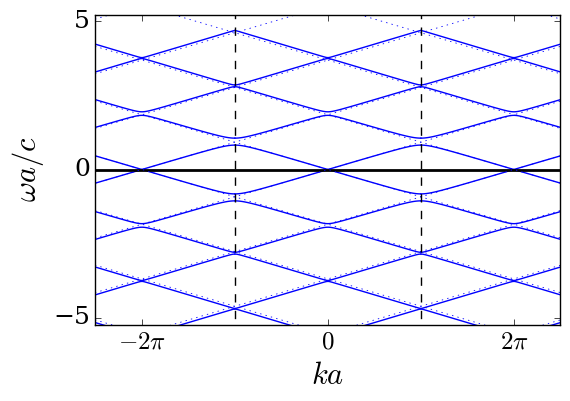

In [31]:

for j in range(2*_N_pp__+1):
    for i in range(-10, 10):
        if j in range(_N_pp__-2, _N_pp__+3):
            plot((np.real(eig_points_kp[j])+i*d_k)*a, (np.real(eig_points_wp[j])+i*d_wc)*a, 'b')
        plot((np.real(eig_points_km[j])+i*d_k)*a, (np.real(eig_points_wm[j])+i*d_wc)*a, 'b')

plot(10*np.array([-d_k, d_k])*a, 10*np.array([-d_w, d_w])*a/constants.c, color='k', linestyle='-', linewidth=2)


show_limit = True ##small modulation limit
if show_limit:
    N = 200
    k_arr = np.linspace(-10.0*k_max, 10.0*k_max, N)
    w_arr = k_arr/n*constants.c
    for i in range(-n_mode, n_mode+1):
        plot((k_arr+i*d_k)*a, (w_arr+i*d_w)*a/constants.c, 'b:', lw=0.6)
        plot((k_arr+i*d_k)*a, (-w_arr+i*d_w)*a/constants.c, 'b:', lw=0.6)

bz = np.array([0.5*d_k*a, 0.5*d_w*a/constants.c])
bz_n = 10.0*np.array([-bz[1], bz[0]])  ##normal
plot([(bz-bz_n)[0], (bz+bz_n)[0]], [(bz-bz_n)[1], (bz+bz_n)[1]], 'k--')
plot([(-bz-bz_n)[0], (-bz+bz_n)[0]], [(-bz-bz_n)[1], (-bz+bz_n)[1]], 'k--')

xticks([-4*pi, -2*pi, 0, 2*pi, 4*pi], ['$-4\pi$', r'$-2\pi$', r'$0$', r'$2\pi$', r'$4\pi$'])
yticks(np.arange(-1, 2)*5)

xlim(-1*k_max*a/2, 1*k_max*a/2)
ylim(-w_max*a/constants.c/2, w_max*a/constants.c/2)
ylabel(r'$\omega a/c$', fontsize=22)
xlabel(r'$ka$', fontsize=22)
gca().set_aspect('equal', 'datalim')

savefig(os.path.join(dir_name, 'nondispersive-epsr-disp' + file_ext), bbox_inches='tight', pad_inches=0.2)


show_wi = False
if show_wi:
    _w_i_ = 2.9
    axhline(_w_i_, color='g', linestyle='-.')
    savefig(os.path.join(dir_name, 'nondispersive-epsr-disp-wi-set' + file_ext), bbox_inches='tight', pad_inches=0.2)


if 'w_i' in globals():
    axhline(w_i*a, color='g', linestyle='-.')
    savefig(os.path.join(dir_name, 'nondispersive-epsr-disp-wi' + file_ext), bbox_inches='tight', pad_inches=0.2)

if 'eig_points_k' in globals():
    #plot(np.real(eig_points_k), np.real(eig_points_w), 'ro', lw=0.1)
    plot(np.real(eig_points_k_m)*a, np.real(eig_points_w_m)*a, 'yo', lw=0.1, markersize=5)
    plot(np.real(eig_points_k_p)*a, np.real(eig_points_w_p)*a, 'ro', lw=0.1, markersize=3)
    savefig(os.path.join(dir_name, 'nondispersive-epsr-disp-modes' + file_ext), bbox_inches='tight', pad_inches=0.2)


if 'eig_points_k_p_BZ' in globals():
    #plot(np.real(eig_points_k), np.real(eig_points_w), 'ro', lw=0.1)
    plot(np.real(eig_points_k_m_BZ)*a, np.real(eig_points_w_m_BZ)*a, 'yo', lw=0.1, markersize=5)
    plot(np.real(eig_points_k_p_BZ)*a, np.real(eig_points_w_p_BZ)*a, 'ro', lw=0.1, markersize=3)
    savefig(os.path.join(dir_name, 'nondispersive-epsr-disp-modes-BZ' + file_ext), bbox_inches='tight', pad_inches=0.2)

show()


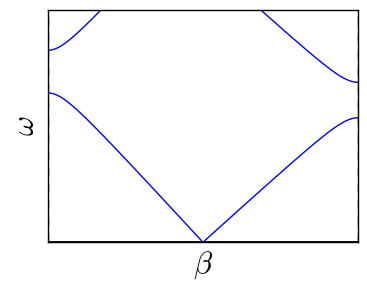

In [53]:
figsize(4, 3)

n_pt = len(eig_points_kp)
n_pt_2 = int(n_pt/2)
pm_ratio = 1.2

for j in range(2*_N_pp__+1):
    for i in range(-10, 10):
        if j in range(_N_pp__-2, _N_pp__+3):
            _x_ = (np.real(eig_points_kp[j])+i*d_k)*a
            _y_ = (np.real(eig_points_wp[j])+i*d_wc)*a
            _y_ = np.ma.masked_where(_x_<0, _y_)
            _x_ = np.ma.masked_where(_x_<0, _x_)
            plot(_x_, _y_, 'b')
        _x_ = (np.real(eig_points_km[j])+i*d_k)*a
        _y_ = (np.real(eig_points_wm[j])+i*d_wc)*a
        _y_ = np.ma.masked_where(_x_<0, _y_)
        _x_ = np.ma.masked_where(_x_<0, _x_)
        plot(_x_*(_x_>0), _y_*(_x_>0), 'b')
for j in range(2*_N_pp__+1):
    for i in range(-10, 10):
        if j in range(_N_pp__-2, _N_pp__+3):
            _x_ = (np.real(eig_points_kp[j])+i*d_k)*a
            _y_ = (np.real(eig_points_wp[j])+i*d_wc)*a*pm_ratio
            _y_ = np.ma.masked_where(_x_>0, _y_)
            _x_ = np.ma.masked_where(_x_>0, _x_)
            plot(_x_, _y_, 'b')
        _x_ = (np.real(eig_points_km[j])+i*d_k)*a
        _y_ = (np.real(eig_points_wm[j])+i*d_wc)*a*pm_ratio
        _y_ = np.ma.masked_where(_x_>0, _y_)
        _x_ = np.ma.masked_where(_x_>0, _x_)
        plot(_x_, _y_, 'b')

plot(10*np.array([-d_k, d_k])*a, 10*np.array([-d_w, d_w])*a/constants.c, color='k', linestyle='-', linewidth=2)

bz = np.array([0.5*d_k*a, 0.5*d_w*a/constants.c])
bz_n = 10.0*np.array([-bz[1], bz[0]])  ##normal
plot([(bz-bz_n)[0], (bz+bz_n)[0]], [(bz-bz_n)[1], (bz+bz_n)[1]], 'k--')
plot([(-bz-bz_n)[0], (-bz+bz_n)[0]], [(-bz-bz_n)[1], (-bz+bz_n)[1]], 'k--')

xticks([])#[-4*pi, -2*pi, 0, 2*pi, 4*pi], ['$-4\pi$', r'$-2\pi$', r'$0$', r'$2\pi$', r'$4\pi$'])
yticks([])#np.arange(-1, 2)*5)

#xlim(-1*k_max*a/3, 1*k_max*a/3)
xlim(-np.pi, np.pi)
ylim(0, w_max*a/constants.c/3)
ylabel(r'$\omega$', fontsize=22)
xlabel(r'$\beta$', fontsize=22)
#gca().set_aspect('equal', 'datalim')

savefig(os.path.join(dir_name, 'nondispersive-epsr-disp' + file_ext), bbox_inches='tight', pad_inches=0.2)


### Scattering

In [27]:
### set omega  get k

Ns = [16]
#print(d_wc)
M_ratio = 0.02
eps_r_harm_vec = None

def eps_r_fun(x):
    z_ = x[0]
    return n**2*(1.0+M_ratio*np.cos(d_k*z_))

def get_eps_r_harmonics(Ns):
    eps_r_harm_vec = pde_FB.getFourierCoeffs(eps_r_fun, [0.0], [(2.0*np.pi)/d_k], Ns)
    return eps_r_harm_vec

w_i = 0.259054      ## for phi=-2 degrees, first bandgap
#w_i = 0.33           ## for phi=+2 degrees, second bandgap

A_mat_list = None

def set_matrices_list(w_i, Ns):
    eps_r_harm_vec = get_eps_r_harmonics(Ns)
    
    EQ_fin = EQ_harm_kw.subs([(omega, w_i)])

    expr_list = [EQ_fin]
    vars = [E_tilde]
    pars = [eps_r_tilde]
    pars_vecs = [eps_r_harm_vec]
    eig_vars = [k]
    pde_FB.setupNumericalParameters(expr_list, Ns, vars, pars, pars_vecs, eig_vars)
    pde_FB.calculateDenseMatrices = True

    A_mat_list = pde_FB.orthogonalToNumpyMatrix()
    return A_mat_list

A_mat_list = set_matrices_list(w_i, Ns)



In [28]:
from Electromagnetics import Misc

solver = 'hybr'
maxiter = 4000
maxfev = 4000
tol = 1.0e-13

A_eqs_list = [A_mat_list]


sing_val_tol = 1.0e-5
del_norm = 1.0e-5
sig_small = 1.0e-1j

_N_pp = 4

def get_eig_points(w_i, Ns, _N_pp, A_eqs_list, vbose=False):

    _N_2 = Ns[0]#int(Ns[0]/2)
    d_dct = np.array([w_i+i*d_wc for i in range(-_N_2, _N_2)])

    roots_prev = []
    eig_points_k = []
    eig_points_w = []
    eig_vecs_E = []
    eig_vecs_H = []

    for j in range(-_N_pp, _N_pp+1):
        eigvar_vals_0 = [k__omega_p_fun(w_i, j)-sig_small]
        res = pde_FB.solveDeterminant(eigvar_vals_0, A_eqs_list, solver=solver, handle_overflow=True, \
                                      roots_prev=roots_prev, tol=tol, maxiter=maxiter, maxfev=maxfev,\
                                      getMats=True)

        k_i = res[0][0]

        if vbose:
            print('k_i, omega_i: ', (k_i, w_i), np.abs(res[1][0]))
        roots_prev.append([k_i])
        eig_points_k.append(k_i)
        eig_points_w.append(w_i)

        A_mat = res[3][0]
        rank, x_nulls, sing_vals = Misc.null(A_mat, rtol=sing_val_tol, forceRank=A_mat.shape[0]-1)
        if not rank==A_mat.shape[0]-1:
            print('rank: ', rank)
            print(sing_vals)
            assert False
        eig_vecs_E.append(x_nulls.T)
        if not np.linalg.norm(A_mat.dot(x_nulls))/np.linalg.norm(x_nulls)<del_norm:
            print('|Ax|=', np.linalg.norm(A_mat.dot(x_nulls)), ' |x|=', np.linalg.norm(x_nulls))
            print(res[2])

        d_dz = -np.array([k_i+i*d_k for i in range(-_N_2, _N_2)])
        H_vec = -x_nulls.T*d_dz/d_dct
        eig_vecs_H.append(H_vec)
        S_P = np.real(eig_vecs_E[-1].dot(np.conjugate(eig_vecs_H[-1]).T))
        if vbose:
            print('S = ', S_P)

        if w_i==0.0 and j==0:
            continue

        eigvar_vals_0 = [k__omega_m_fun(w_i, j)+sig_small]
        res = pde_FB.solveDeterminant(eigvar_vals_0, A_eqs_list, solver=solver, handle_overflow=True, \
                                      roots_prev=roots_prev, tol=tol, maxiter=maxiter, maxfev=maxfev,\
                                      getMats=True)

        k_i = res[0][0]

        if vbose:
            print('k_i, omega_i: ', (k_i, w_i), np.abs(res[1][0]))
        roots_prev.append([k_i])
        eig_points_k.append(k_i)
        eig_points_w.append(w_i)

        A_mat = res[3][0]
        rank, x_nulls, sing_vals = Misc.null(A_mat, rtol=sing_val_tol, forceRank=A_mat.shape[0]-1)
        if not rank==A_mat.shape[0]-1:
            print('rank: ', rank)
            print(sing_vals)
            assert False
        eig_vecs_E.append(x_nulls.T)
        if not np.linalg.norm(A_mat.dot(x_nulls))/np.linalg.norm(x_nulls)<del_norm:
            print('|Ax|=', np.linalg.norm(A_mat.dot(x_nulls)), ' |x|=', np.linalg.norm(x_nulls))

        d_dz = -np.array([k_i+i*d_k for i in range(-_N_2, _N_2)])
        H_vec = -x_nulls.T*d_dz/d_dct
        eig_vecs_H.append(H_vec)
        S_P = np.real(eig_vecs_E[-1].dot(np.conjugate(eig_vecs_H[-1]).T))
        if vbose:
            print('S = ', S_P)

    eig_points_k_p = []
    eig_points_w_p = []
    eig_vecs_E_p = []
    eig_vecs_H_p = []

    eig_points_k_m = []
    eig_points_w_m = []
    eig_vecs_E_m = []
    eig_vecs_H_m = []

    for i in range(len(eig_points_k)):
        if np.abs(np.imag(eig_points_k[i]))<1.0e-10:
            if np.real(eig_vecs_E[i].dot(np.conjugate(eig_vecs_H[i]).T))>=0:
                eig_points_k_p.append(eig_points_k[i])
                eig_points_w_p.append(eig_points_w[i])
                eig_vecs_E_p.append(eig_vecs_E[i][0,:])
                eig_vecs_H_p.append(eig_vecs_H[i][0,:])
            else:
                eig_points_k_m.append(eig_points_k[i])
                eig_points_w_m.append(eig_points_w[i])
                eig_vecs_E_m.append(eig_vecs_E[i][0,:])
                eig_vecs_H_m.append(eig_vecs_H[i][0,:])
        else:
            if np.imag(eig_points_k[i])<=0:
                eig_points_k_p.append(eig_points_k[i])
                eig_points_w_p.append(eig_points_w[i])
                eig_vecs_E_p.append(eig_vecs_E[i][0,:])
                eig_vecs_H_p.append(eig_vecs_H[i][0,:])
            else:
                eig_points_k_m.append(eig_points_k[i])
                eig_points_w_m.append(eig_points_w[i])
                eig_vecs_E_m.append(eig_vecs_E[i][0,:])
                eig_vecs_H_m.append(eig_vecs_H[i][0,:])


    if vbose:
        print('\n eig_points_k_p: ', eig_points_k_p)
        print('\n eig_points_k_m: ', eig_points_k_m)

    ##move inside BZ

    eig_points_k_p_BZ = eig_points_k_p.copy()
    eig_points_k_m_BZ = eig_points_k_m.copy()
    eig_points_w_p_BZ = eig_points_w_p.copy()
    eig_points_w_m_BZ = eig_points_w_m.copy()

    for i in range(len(eig_points_k_p_BZ)):
        _w_, _k_ = eig_points_w_p_BZ[i], eig_points_k_p_BZ[i]
        _K_ = K_sub_fun(_k_.real, _w_.real)
        while _K_>d_kw: 
            _w_ -= d_wc*np.sign(d_k)
            _k_ -= d_k*np.sign(d_k)
            _K_ = K_sub_fun(_k_.real, _w_.real)
        while _K_<-d_kw:
            _w_ += d_wc*np.sign(d_k)
            _k_ += d_k*np.sign(d_k)
            _K_ = K_sub_fun(_k_.real, _w_.real)
        eig_points_w_p_BZ[i], eig_points_k_p_BZ[i] = _w_, _k_
        _K_ = K_sub_fun(_k_.real, _w_.real)
        assert -d_kw<=_K_<=d_kw
    for i in range(len(eig_points_k_m_BZ)):
        _w_, _k_ = eig_points_w_m_BZ[i], eig_points_k_m_BZ[i]
        _K_ = K_sub_fun(_k_.real, _w_.real)
        while _K_>d_kw:
            _w_ -= d_wc*np.sign(d_k)
            _k_ -= d_k*np.sign(d_k)
            _K_ = K_sub_fun(_k_.real, _w_.real)
        while _K_<-d_kw:
            _w_ += d_wc*np.sign(d_k)
            _k_ += d_k*np.sign(d_k)
            _K_ = K_sub_fun(_k_.real, _w_.real)
        eig_points_w_m_BZ[i], eig_points_k_m_BZ[i] = _w_, _k_
        _K_ = K_sub_fun(_k_.real, _w_.real)
        assert -d_kw<=_K_<=d_kw

    return [eig_points_k, eig_points_w, eig_vecs_E, eig_vecs_H], \
        [eig_points_k_p, eig_points_w_p, eig_vecs_E_p, eig_vecs_H_p], \
        [eig_points_k_m, eig_points_w_m, eig_vecs_E_m, eig_vecs_H_m], \
        [eig_points_k_p_BZ, eig_points_k_m_BZ, eig_points_w_p_BZ, eig_points_w_m_BZ]

[eig_points_k, eig_points_w, eig_vecs_E, eig_vecs_H], \
[eig_points_k_p, eig_points_w_p, eig_vecs_E_p, eig_vecs_H_p], \
[eig_points_k_m, eig_points_w_m, eig_vecs_E_m, eig_vecs_H_m], \
[eig_points_k_p_BZ, eig_points_k_m_BZ, eig_points_w_p_BZ, eig_points_w_m_BZ] = get_eig_points(w_i, Ns, _N_pp, A_eqs_list, True)




/home/nima/ipython workspace/Electromagnetics/FourierBlochND.py:1824: OptimizeWarning: Unknown solver options: maxiter, ftol
  options={'maxfev':maxfev, 'maxiter':maxiter, 'ftol': ftol})


k_i, omega_i:  ((-8.0636094376011602-1.5253022541478552e-21j), 0.259054) 4.98584824491e-13
S =  [[ 3.40000367]]
k_i, omega_i:  ((-7.9266438028458452+2.7513043863759237e-20j), 0.259054) 2.603125166e-12
S =  [[-3.4000063]]
k_i, omega_i:  ((-5.8275106490259061-2.0884568541907192e-22j), 0.259054) 7.69156301004e-15
S =  [[ 3.40000394]]
k_i, omega_i:  ((-6.1651791483793232-4.7422376650220447e-15j), 0.259054) 1.69899227919e-13
S =  [[-3.40000839]]
k_i, omega_i:  ((-3.5914088009799672-7.0768060304983603e-18j), 0.259054) 2.00829817919e-16
S =  [[ 3.39998915]]
k_i, omega_i:  ((-4.4037155496251934+1.680146326779115e-17j), 0.259054) 9.16017253318e-16
S =  [[-3.40002012]]
k_i, omega_i:  ((-1.3552903295552436+3.0281132814901011e-19j), 0.259054) 6.34024125527e-19
S =  [[ 3.39966807]]
k_i, omega_i:  ((-2.6422558728049621-1.5797950383188145e-18j), 0.259054) 7.68399306216e-18
S =  [[-3.4000343]]
k_i, omega_i:  ((0.88072866042622344-0.0049615836901116695j), 0.259054) 1.40687429525e-23
S =  [[-0.40364905]

In [29]:
##check linear dependence
"""
E0_E1 = eig_vecs_E_p[0]/np.roll(eig_vecs_E_p[1], np.argmax(np.abs(eig_vecs_E_p[0]))-np.argmax(np.abs(eig_vecs_E_p[1])))
plot(np.log10(np.abs(eig_vecs_E_p[0])))
plot(np.log10(np.abs(E0_E1)))
ylim([-10, 5])
grid()
"""


def check_linear_dependence(vbose=False):
    if vbose:
        print(eig_vecs_E_p[0].shape)
    _small_ = 1.0e-10
    n_elem = eig_vecs_E_p[0].shape[0]

    linearly_dep =[]

    for i in range(len(eig_points_k_p)):
        E_i = (np.abs(eig_vecs_E_p[i])>_small_*np.linalg.norm(eig_vecs_E_p[i]))*eig_vecs_E_p[i]
        E_i_nnz = (E_i!=0.0)
        s_i = np.argmax(np.abs(E_i))
        for j in range(i+1, len(eig_points_k_p)):
            E_j = (np.abs(eig_vecs_E_p[j])>_small_*np.linalg.norm(eig_vecs_E_p[j]))*eig_vecs_E_p[j]

            E_j_max_inds = np.abs(E_j)>0.9*np.max(np.abs(E_j))
            s_j_list = [_i_ for _i_ in range(len(E_j_max_inds)) if E_j_max_inds[_i_]==1]

            for s_j in s_j_list:
                E_j_s = np.roll(E_j, s_i-s_j)

                E_j_nnz = (E_j_s!=0.0)
                E_ij_nnz = np.logical_and(E_i_nnz, E_j_nnz)

                Ei_Ejs = np.nan_to_num(E_ij_nnz*(E_i/E_j_s))
                Ei_Ejs_max = Ei_Ejs[np.argmax(np.abs(Ei_Ejs))]
                #print(Ei_Ejs)

                if abs(Ei_Ejs_max)>0.0:
                    norm_p = np.linalg.norm(E_ij_nnz*(np.ones(n_elem)) - (Ei_Ejs/Ei_Ejs_max))
                    norm_m = np.linalg.norm(E_ij_nnz*(np.ones(n_elem)) + (Ei_Ejs/Ei_Ejs_max))

                    assert not np.isnan(norm_p)
                    assert not np.isnan(norm_m)

                    if min([norm_p, norm_m])<1.0e-5:
                        found = False
                        for k in range(len(linearly_dep)):
                            if i in linearly_dep[k]:
                                if j not in linearly_dep[k]:
                                    linearly_dep[k].append(j)
                                found = True
                        if not found:
                            linearly_dep.append([i, j])
                        break

    if vbose:
        print('linearly_dep: ', linearly_dep)

    ind_remove = []
    for i in range (len(linearly_dep)):
        ld_sorted = sorted(linearly_dep[i])
        ind_remove.extend(ld_sorted[1:])

    if vbose:
        print('To remove: ', ind_remove)

    ind_remove = sorted(list(set(ind_remove)), reverse=True)
    for i in range(len(ind_remove)):
        del eig_points_k_p[ind_remove[i]]
        del eig_points_w_p[ind_remove[i]]
        del eig_vecs_E_p[ind_remove[i]]
        del eig_vecs_H_p[ind_remove[i]]


    if vbose:
        print('eig_points_k_p : ', eig_points_k_p)
        print(len(eig_points_k_p))

    ###-----------
    if vbose:
        print('-'*50)
    linearly_dep =[]

    for i in range(len(eig_points_k_m)):
        E_i = (np.abs(eig_vecs_E_m[i])>_small_*np.linalg.norm(eig_vecs_E_m[i]))*eig_vecs_E_m[i]
        E_i_nnz = (E_i!=0.0)
        s_i = np.argmax(np.abs(E_i))
        for j in range(i+1, len(eig_points_k_m)):
            E_j = (np.abs(eig_vecs_E_m[j])>_small_*np.linalg.norm(eig_vecs_E_m[j]))*eig_vecs_E_m[j]

            E_j_max_inds = np.abs(E_j)>0.9*np.max(np.abs(E_j))
            s_j_list = [_i_ for _i_ in range(len(E_j_max_inds)) if E_j_max_inds[_i_]==1]

            for s_j in s_j_list:
                E_j_s = np.roll(E_j, s_i-s_j)

                E_j_nnz = (E_j_s!=0.0)
                E_ij_nnz = np.logical_and(E_i_nnz, E_j_nnz)

                Ei_Ejs = np.nan_to_num(E_ij_nnz*(E_i/E_j_s))
                Ei_Ejs_max = Ei_Ejs[np.argmax(np.abs(Ei_Ejs))]
                #print(Ei_Ejs)

                if abs(Ei_Ejs_max)>0.0:
                    norm_p = np.linalg.norm(E_ij_nnz*(np.ones(n_elem)) - (Ei_Ejs/Ei_Ejs_max))
                    norm_m = np.linalg.norm(E_ij_nnz*(np.ones(n_elem)) + (Ei_Ejs/Ei_Ejs_max))

                    assert not np.isnan(norm_p)
                    assert not np.isnan(norm_m)

                    if min([norm_p, norm_m])<1.0e-5:
                        found = False
                        for k in range(len(linearly_dep)):
                            if i in linearly_dep[k]:
                                if j not in linearly_dep[k]:
                                    linearly_dep[k].append(j)
                                found = True
                        if not found:
                            linearly_dep.append([i, j])
                        break

    if vbose:
        print('linearly_dep: ', linearly_dep)

    ind_remove = []
    for i in range (len(linearly_dep)):
        ld_sorted = sorted(linearly_dep[i])
        ind_remove.extend(ld_sorted[1:])

    if vbose:
        print('To remove: ', ind_remove)

    ind_remove = sorted(list(set(ind_remove)), reverse=True)
    for i in range(len(ind_remove)):
        del eig_points_k_m[ind_remove[i]]
        del eig_points_w_m[ind_remove[i]]
        del eig_vecs_E_m[ind_remove[i]]
        del eig_vecs_H_m[ind_remove[i]]


    if vbose:
        print('eig_points_k_m : ', eig_points_k_m)
        print(len(eig_points_k_m))

check_linear_dependence(vbose=True)


(32,)
linearly_dep:  []
To remove:  []
eig_points_k_p :  [(-8.0636094376011602-1.5253022541478552e-21j), (-5.8275106490259061-2.0884568541907192e-22j), (-3.5914088009799672-7.0768060304983603e-18j), (-1.3552903295552436+3.0281132814901011e-19j), (0.88072866042622344-0.0049615836901116695j), (3.116789921768508+1.1406741555918797e-18j), (5.3529075542394429+7.072843325511788e-18j), (7.5890077832600973+3.3359782030873741e-18j), (9.825103476024724+2.4425896218331212e-18j)]
9
--------------------------------------------------
linearly_dep:  []
To remove:  []
eig_points_k_m :  [(-7.9266438028458452+2.7513043863759237e-20j), (-6.1651791483793232-4.7422376650220447e-15j), (-4.4037155496251934+1.680146326779115e-17j), (-2.6422558728049621-1.5797950383188145e-18j), (-0.88081323440945436+1.3267871705390227e-19j), (0.88072866042622344+0.0049615836901116695j), (2.64222815142343-1.7487544057770076e-18j), (4.4036711892388407+1.815972250105267e-20j), (6.1651315856866322-9.0954077053883464e-18j)]
9


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:35: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:101: RuntimeWarning: invalid value encountered in true_divide


w_Er:  [ 0.53824997  0.46845098  0.39865199  0.32885299  0.259054    0.18925501
  0.11945601  0.04965702 -0.02014197]
Hr_Er:  [-3.4 -3.4 -3.4 -3.4 -3.4 -3.4 -3.4 -3.4 -3.4]
Ei   :  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.]
Hi   :  [ 0.   0.   0.   0.   3.4  0.   0.   0.   0. ]
|x|:  [  2.84057983e-07   8.38511107e-06   4.33566750e-03   1.12667596e+00
   2.81664932e-03   9.13230529e-04   7.56516738e-07   2.93584467e-10
   5.18698816e-14   4.85748383e-14   3.42089509e-10   1.06802242e-06
   1.43888776e-03   1.50648497e+00   2.50047881e-03   1.70742565e-03
   9.20067597e-06   1.40986077e-09]


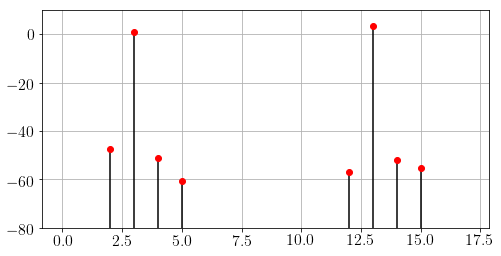

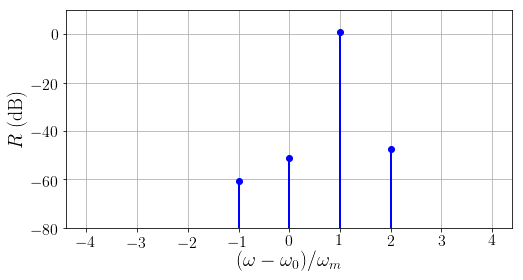

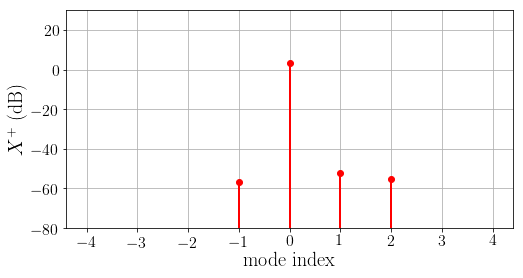

In [30]:
##--- half-space 

z_0 = 0.0
n_0 = n

_N_2 = Ns[0]
N_mode = len(eig_points_k_p)

N_mode_2 = int(N_mode/2)
w_Er = np.array([w_i+(i-N_mode_2)*d_wc for i in range(N_mode)])   ## reflected frequencies
print('w_Er: ', w_Er)

Hr_Er_w = -n_0*np.ones(N_mode)    ## H_r(w)/E_r(w)
Ei_w = np.zeros(N_mode); Ei_w[N_mode_2]=1.0
Hi_Ei_w = n_0*np.ones(N_mode) 
Hi_w = Hi_Ei_w*Ei_w
print('Hr_Er: ', Hr_Er_w)
print('Ei   : ', Ei_w)
print('Hi   : ', Hi_w)

A = np.zeros((2*N_mode, 2*N_mode), dtype=complex)
rhs = np.zeros(2*N_mode, dtype=complex)

ind_r = lambda w_i: w_i
ind_sp = lambda w_i: w_i+N_mode
ind_iw_sp = lambda w_i: i_w-N_mode_2+_N_2

for i_w in range(N_mode):  ## iterate over frequencies
    A[ind_r(i_w), ind_r(i_w)] = -1.0
    A[ind_sp(i_w), ind_r(i_w)] = -Hr_Er_w[i_w]

    rhs[ind_r(i_w)] = Ei_w[i_w]
    rhs[ind_sp(i_w)] = Hi_w[i_w]
    for i_m in range(N_mode): ## iterate over modes
        if d_wc!=0.0:
            #E_left(w_i) = E_right(w_i)
            A[ind_r(i_w), ind_sp(i_m)] =  eig_vecs_E_p[i_m][ind_iw_sp(i_w)]

            #H_left(w_i) = H_right(w_i)
            A[ind_sp(i_w), ind_sp(i_m)] =  eig_vecs_H_p[i_m][ind_iw_sp(i_w)]
        else:
            #E_left(w_i) = E_right(w_i)
            A[ind_r(i_w), ind_sp(i_m)] =  np.sum(eig_vecs_E_p[i_m])

            #H_left(w_i) = H_right(w_i)
            A[ind_sp(i_w), ind_sp(i_m)] =  np.sum(eig_vecs_H_p[i_m])
        
#print('A: \n', A)
#print('rhs: ', rhs)
#print('eig_vecs_E_p: ', eig_vecs_E_p)
#print('ind_iw_sp(i_w)', ind_iw_sp(0))    
    
x = np.linalg.solve(A, rhs)

print('|x|: ', np.abs(x))

figsize(8, 4)
plot(np.arange(2*N_mode), 20*np.log10(np.abs(x)), 'ro')
vlines(np.arange(2*N_mode), -100*np.ones(2*N_mode), (20*np.log10(np.abs(x))))
ylim([-80, 10.0])
grid()
show()

w_scaled = (w_Er-w_i)/abs(d_wc)
x_R = x[0:N_mode]
plot(w_scaled, 20*np.log10(np.abs(x_R)), 'bo')
vlines(w_scaled, -100*np.ones(len(w_scaled)), (20*np.log10(np.abs(x_R))), linewidth=2, color='b')
xlabel(r'$(\omega-\omega_0)/\omega_m$', fontsize=20)
ylabel(r'$R$ (dB)', fontsize=20)
ylim([-80, 10.0])
grid()
savefig(os.path.join(dir_name, 'nondispersive-epsr-halfspace-R' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()

k_scaled = np.arange(N_mode)-int(N_mode/2)
x_SP = x[N_mode:2*N_mode]
plot(k_scaled, 20*np.log10(np.abs(x_SP)), 'ro')
vlines(k_scaled, -100*np.ones(len(k_scaled)), (20*np.log10(np.abs(x_SP))), linewidth=2, color='r')
xlabel(r'mode index', fontsize=20)
ylabel(r'$X^+$ (dB)', fontsize=20)
ylim([-80, 30.0])
grid()
savefig(os.path.join(dir_name, 'nondispersive-epsr-halfspace-modes' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()



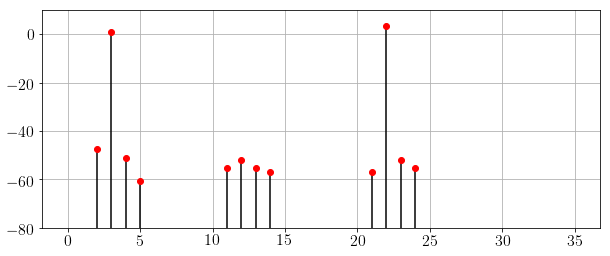

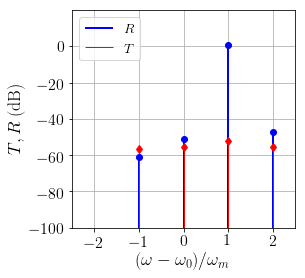

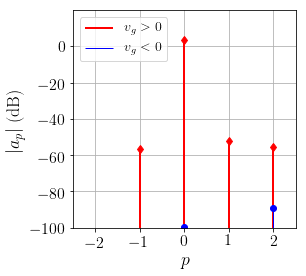

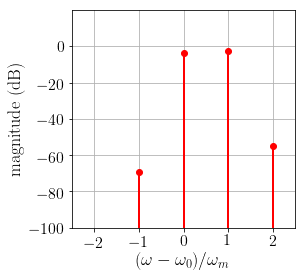

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


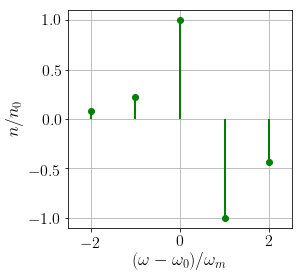

4 (0.880728660426-0.00496158369011j)


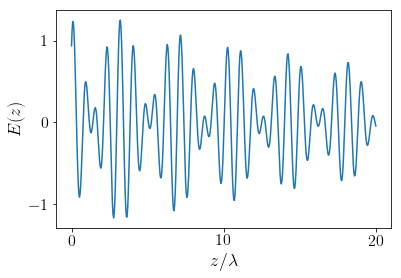

In [31]:
## slab

lambda_g = 2.0*np.pi/(w_i*n)

z_0 = 0.0     ## later assumed z_0=0
z_1 = 200.0*lambda_g
n_0 = n
n_1 = n

excitation_from_right_side = False
#if phi>0.0:
#    excitation_from_right_side = True

w_Er = None 
_N_2 = Ns[0]

def solveSlab(Ns, w_i, z_0, z_1, vbose=False):
    global w_Er
    _N_2 = Ns[0]
    
    N_mode_p = len(eig_points_k_p)
    N_mode_m = len(eig_points_k_m)
    if N_mode_p>N_mode_m:
        for i in range(N_mode_p-N_mode_m):
            del eig_points_k_p[-1]
            del eig_points_w_p[-1]
            del eig_vecs_E_p[-1]
            del eig_vecs_H_p[-1]
    elif N_mode_m>N_mode_p:
        for i in range(N_mode_m-N_mode_p):
            del eig_points_k_m[-1]
            del eig_points_w_m[-1]
            del eig_vecs_E_m[-1]
            del eig_vecs_H_m[-1]

    N_mode_p = len(eig_points_k_p)
    N_mode_m = len(eig_points_k_m)

    assert N_mode_p==N_mode_m

    N_mode = int((N_mode_p + N_mode_m)/2)
    N_mode_2 = int(N_mode/2)
    w_Er = np.array([w_i+(i-N_mode_2)*d_wc for i in range(N_mode)])   ## reflected and transmitted frequencies
    if vbose:
        print('w_Er: ', w_Er)

    Hr_Er_w = -n_0*np.ones(N_mode)    ## H_r(w)/E_r(w)
    Ht_Et_w = n_1*np.ones(N_mode)    ## H_t(w)/E_t(w)
    Ei_w = np.zeros(N_mode); Ei_w[N_mode_2]=1.0
    Hi_Ei_w = n_0*np.ones(N_mode) 
    Hi_w = Hi_Ei_w*Ei_w
    if vbose:
        print('Hr_Er: ', Hr_Er_w)
        print('Ei   : ', Ei_w)
        print('Hi   : ', Hi_w)

    k_arr = np.array([(i-_N_2)*d_k for i in range(2*_N_2)])
    e_jkpd = [None]*N_mode_p
    for i in range(N_mode_p):
        e_jkpd[i] = np.exp(-1j*(eig_points_k_p[i]+k_arr)*(z_1-z_0))
    e_jkmd = [None]*N_mode_m
    for i in range(N_mode_m):
        e_jkmd[i] = np.exp(-1j*(eig_points_k_m[i]+k_arr)*(z_1-z_0))

    A = np.zeros((4*N_mode, 4*N_mode), dtype=complex)
    rhs = np.zeros(4*N_mode, dtype=complex)

    ind_r = lambda w_i: w_i
    ind_t = lambda w_i: w_i+N_mode
    ind_sp = lambda w_i: w_i+2*N_mode
    ind_sm = lambda w_i: w_i+3*N_mode
    ind_iw_sp = lambda w_i: i_w-N_mode_2+_N_2
    ind_iw_sm = lambda w_i: i_w-N_mode_2+_N_2

    for i_w in range(N_mode):  ## iterate over frequencies
        A[ind_r(i_w), ind_r(i_w)] = -1.0
        A[ind_t(i_w), ind_t(i_w)] =  1.0
        A[ind_sp(i_w), ind_r(i_w)] = -Hr_Er_w[i_w]
        A[ind_sm(i_w), ind_t(i_w)] =  Ht_Et_w[i_w]

        rhs[ind_r(i_w)] = Ei_w[i_w]
        rhs[ind_sp(i_w)] = Hi_w[i_w]
        for i_m in range(N_mode): ## iterate over modes
            if d_wc!=0.0:
                #left wall E_left(w_i) = E_right(w_i)
                A[ind_r(i_w), ind_sp(i_m)] =  eig_vecs_E_p[i_m][ind_iw_sp(i_w)]
                A[ind_r(i_w), ind_sm(i_m)] =  eig_vecs_E_m[i_m][ind_iw_sm(i_w)]
                #right wall E_left(w_i) = E_right(w_i)
                A[ind_t(i_w), ind_sp(i_m)] =  -(eig_vecs_E_p[i_m]*e_jkpd[i_m])[ind_iw_sp(i_w)]
                A[ind_t(i_w), ind_sm(i_m)] =  -(eig_vecs_E_m[i_m]*e_jkmd[i_m])[ind_iw_sm(i_w)]

                #left wall H_left(w_i) = H_right(w_i)
                A[ind_sp(i_w), ind_sp(i_m)] =  eig_vecs_H_p[i_m][ind_iw_sp(i_w)]
                A[ind_sp(i_w), ind_sm(i_m)] =  eig_vecs_H_m[i_m][ind_iw_sm(i_w)]
                #right wall H_left(w_i) = H_right(w_i)
                A[ind_sm(i_w), ind_sp(i_m)] =  -(eig_vecs_H_p[i_m]*e_jkpd[i_m])[ind_iw_sp(i_w)]
                A[ind_sm(i_w), ind_sm(i_m)] =  -(eig_vecs_H_m[i_m]*e_jkmd[i_m])[ind_iw_sm(i_w)]
            else:
                #left wall E_left(w_i) = E_right(w_i)
                A[ind_r(i_w), ind_sp(i_m)] =  np.sum(eig_vecs_E_p[i_m])
                A[ind_r(i_w), ind_sm(i_m)] =  np.sum(eig_vecs_E_m[i_m])
                #right wall E_left(w_i) = E_right(w_i)
                A[ind_t(i_w), ind_sp(i_m)] =  -np.sum(eig_vecs_E_p[i_m]*e_jkpd[i_m])
                A[ind_t(i_w), ind_sm(i_m)] =  -np.sum(eig_vecs_E_m[i_m]*e_jkmd[i_m])

                #left wall H_left(w_i) = H_right(w_i)
                A[ind_sp(i_w), ind_sp(i_m)] =  np.sum(eig_vecs_H_p[i_m])
                A[ind_sp(i_w), ind_sm(i_m)] =  np.sum(eig_vecs_H_m[i_m])
                #right wall H_left(w_i) = H_right(w_i)
                A[ind_sm(i_w), ind_sp(i_m)] =  -np.sum(eig_vecs_H_p[i_m]*e_jkpd[i_m])
                A[ind_sm(i_w), ind_sm(i_m)] =  -np.sum(eig_vecs_H_m[i_m]*e_jkmd[i_m])

    #print('A: \n', A)
    #print('rhs: ', rhs)
    #print('eig_vecs_E_p: ', eig_vecs_E_p)
    #print('ind_iw_sp(i_w)', ind_iw_sp(0))    

    x = np.linalg.solve(A, rhs)

    if vbose:
        print('|x|: ', np.abs(x))
    return x

x = solveSlab(Ns, w_i, z_0, z_1)
assert len(x)%4==0
N_mode = int(len(x)/4)
N_mode_2 = int(N_mode/2)


font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)


figsize(10, 4)
plot(np.arange(4*N_mode), 20*np.log10(np.abs(x)), 'ro')
vlines(np.arange(4*N_mode), -100*np.ones(4*N_mode), (20*np.log10(np.abs(x))))
ylim([-80, 10.0])
grid()
show()

    
figsize(4, 4)
w_scaled = (w_Er-w_i)/abs(d_wc)
x_R = x[0:N_mode]
x_T = x[N_mode:2*N_mode]
plot(w_scaled, 20*np.log10(np.abs(x_R)), 'bo')
plot(w_scaled, 20*np.log10(np.abs(x_T)), 'rd')
vlines(w_scaled, -100*np.ones(N_mode), (20*np.log10(np.abs(x_R))), linewidth=2, color='b', label='$R$')
vlines(w_scaled, -100*np.ones(N_mode), (20*np.log10(np.abs(x_T))), linewidth=1, color='r', label='$T$')
xlabel(r'$(\omega-\omega_0)/\omega_m$', fontsize=18)
ylabel(r'$T, R$ (dB)', fontsize=18)
xlim([-2.5, 2.5])
ylim([-100, 20.0])
xticks(np.arange(-2, 3))
yticks(np.arange(-100, 10, 20))
legend(loc='upper left', fontsize=14)
grid()
savefig(os.path.join(dir_name, 'nondispersive-epsr-slab-RT' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()


k_scaled = np.arange(N_mode)-N_mode_2
x_SP = x[2*N_mode:3*N_mode]
x_SM = x[3*N_mode:4*N_mode]
if excitation_from_right_side:
    k_scaled = -k_scaled
    x_SP = x[3*N_mode:4*N_mode]
    x_SM = x[2*N_mode:3*N_mode]
plot(k_scaled, 20*np.log10(np.abs(x_SP)), 'rd')
plot(k_scaled, 20*np.log10(np.abs(x_SM)), 'bo')
vlines(k_scaled, -100*np.ones(N_mode), 20*np.log10(np.abs(x_SP)), linewidth=2, color='r', label=r'$v_g>0$')
vlines(k_scaled, -100*np.ones(N_mode), 20*np.log10(np.abs(x_SM)), linewidth=1, color='b', label=r'$v_g<0$')
xlabel(r'$p$', fontsize=18)
ylabel(r'$|a_p|$ (dB)', fontsize=18)
xlim([-2.5, 2.5])
ylim([-100, 20.0])
xticks(np.arange(-2, 3))
yticks(np.arange(-100, 10, 20))
legend(loc='upper left', fontsize=14)
grid()
savefig(os.path.join(dir_name, 'nondispersive-epsr-slab-modes' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()


ind_mode_show_p = 0 + N_mode_2
eig_vecs_E_p_show = eig_vecs_E_p[ind_mode_show_p]
plot(np.arange(-_N_2, _N_2)*np.sign(d_wc), 20*np.log10(np.abs(eig_vecs_E_p_show)), 'ro')
vlines(np.arange(-_N_2, _N_2)*np.sign(d_wc), -100*np.ones(N_mode), 20*np.log10(np.abs(eig_vecs_E_p_show)), linewidth=2, color='r')
xlabel(r'$(\omega-\omega_0)/\omega_m$', fontsize=18)
ylabel(r'magnitude (dB)', fontsize=18)
xlim([-2.5, 2.5])
ylim([-100, 20])
xticks(np.arange(-2, 3))
yticks(np.arange(-100, 10, 20))
grid()
savefig(os.path.join(dir_name, 'nondispersive-epsr-slab-harmonics' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()

eig_vecs_H_p_show = eig_vecs_H_p[ind_mode_show_p]
plot(np.arange(-_N_2, _N_2)*np.sign(d_wc), eig_vecs_E_p_show/eig_vecs_H_p_show*n, 'go')
vlines(np.arange(-_N_2, _N_2)*np.sign(d_wc), 0*np.ones(N_mode), eig_vecs_E_p_show/eig_vecs_H_p_show*n, linewidth=2, color='g')
xlabel(r'$(\omega-\omega_0)/\omega_m$', fontsize=18)
ylabel(r'$n/n_0$', fontsize=18)
xlim([-2.5, 2.5])
#ylim([-100, 10])
#yticks(np.arange(-100, 10, 20))
grid()
savefig(os.path.join(dir_name, 'nondispersive-epsr-slab-harmimpedance' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()


figsize(6, 4)

z = np.linspace(z_0, z_1/10, 500)
k_p_show = eig_points_k_p[ind_mode_show_p]
print(ind_mode_show_p, k_p_show)
E_mode = np.zeros(len(z), dtype=complex)
for m in range(-_N_2, _N_2):
    E_mode += eig_vecs_E_p_show[m+_N_2]*np.exp(-1j*(k_p_show+m*d_k)*z)
plot(z/lambda_g, np.real(E_mode))
xlabel(r'$z/\lambda$', fontsize=18)
ylabel(r'$E(z)$', fontsize=18)
xticks(np.arange(0, 30, 10))
yticks(np.arange(-1, 2, 1))
savefig(os.path.join(dir_name, 'nondispersive-epsr-slab-mode-profile' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()

np.savez(os.path.join(dir_name, 'nondispersive-epsr-slab-RT'), x_R=x_R, x_T=x_T, w_scaled=w_scaled, w_i=w_i, d_wc=d_wc, d_k=d_k)


0


/home/nima/ipython workspace/Electromagnetics/FourierBlochND.py:1824: OptimizeWarning: Unknown solver options: ftol, maxiter
  options={'maxfev':maxfev, 'maxiter':maxiter, 'ftol': ftol})
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:35: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:101: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:101: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:101: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:55: RuntimeWarning: o

1
2


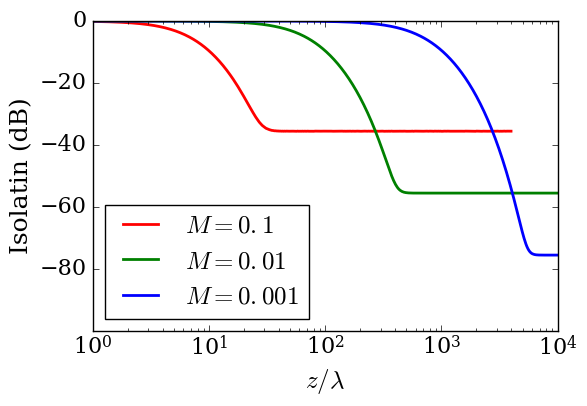

In [21]:
## isolation/length
w_i = 0.259054
Ns = [32]
lambda_g = 2.0*np.pi/(w_i*n)

N_z1 = 500
#z_1_arr = np.linspace(1.0*lambda_g, 10000.0*lambda_g, N_z1)
z_1_arr = np.logspace(np.log10(1.0*lambda_g), np.log10(1.0e4*lambda_g), N_z1, endpoint=True)

M_ratio_arr = [0.1, 0.01, 0.001]
colors = ['r', 'g', 'b']
labels = [r'$M = 0.1$', r'$M = 0.01$', r'$M = 0.001$']
N_M_rat = len(M_ratio_arr)

R_abs = np.zeros((N_M_rat, N_z1))
T_abs = np.zeros((N_M_rat, N_z1))

for j in range(N_M_rat):
    print(j)
    global M_ratio
    global eig_points_k, eig_points_w, eig_vecs_E, eig_vecs_H, \
        eig_points_k_p, eig_points_w_p, eig_vecs_E_p, eig_vecs_H_p, \
        eig_points_k_m, eig_points_w_m, eig_vecs_E_m, eig_vecs_H_m, \
        eig_points_k_p_BZ, eig_points_k_m_BZ, eig_points_w_p_BZ, eig_points_w_m_BZ

    M_ratio = M_ratio_arr[j]
    A_mat_list = set_matrices_list(w_i, Ns)
    [eig_points_k, eig_points_w, eig_vecs_E, eig_vecs_H], \
    [eig_points_k_p, eig_points_w_p, eig_vecs_E_p, eig_vecs_H_p], \
    [eig_points_k_m, eig_points_w_m, eig_vecs_E_m, eig_vecs_H_m], \
    [eig_points_k_p_BZ, eig_points_k_m_BZ, eig_points_w_p_BZ, eig_points_w_m_BZ] = get_eig_points(w_i, Ns, _N_pp=10, A_eqs_list=[A_mat_list], vbose=False)
    check_linear_dependence(vbose=False)

    for i in range(N_z1):

        z_1 = z_1_arr[i]
        x = solveSlab(Ns, w_i, z_0, z_1)
        assert len(x)%4==0
        N_mode = int(len(x)/4)
        N_mode_2 = int(N_mode/2)

        x_R = x[0:N_mode]
        x_T = x[N_mode:2*N_mode]

        R_abs[j, i] = np.linalg.norm(x_R)
        T_abs[j, i] = np.linalg.norm(x_T)
    
for j in range(N_M_rat):
    #plot(z_1_arr/lambda_g, 20*np.log10(R_abs[j]), 'r')
    plot(z_1_arr/lambda_g, 20*np.log10(T_abs[j]), colors[j], label=labels[j], lw=2)
xscale('log')
xlabel(r'$z/\lambda$', fontsize=18)
ylabel(r'Isolatin (dB)', fontsize=18)
#xticks(np.arange(0, 30, 10))
yticks(np.arange(-80, 10, 20))
ylim([-100, 0])
legend(loc='best', fontsize=18)
savefig(os.path.join(dir_name, 'nondispersive-epsr-slab-isolation' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()

np.savez(os.path.join(dir_name, 'nondispersive-epsr-slab-RT-L-M-1-p'), R_abs=R_abs, T_abs=T_abs, z_1_arr=z_1_arr, w_scaled=w_scaled, w_i=w_i, d_wc=d_wc, d_k=d_k)



/home/nima/ipython workspace/Electromagnetics/FourierBlochND.py:1824: OptimizeWarning: Unknown solver options: ftol, maxiter
  options={'maxfev':maxfev, 'maxiter':maxiter, 'ftol': ftol})
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:101: RuntimeWarning: invalid value encountered in true_divide


(0: w=0.282240, T=86561.1480) 

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:35: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:101: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:101: RuntimeWarning: invalid value encountered in multiply


(1: w=0.284592, T=0.8589) (2: w=0.286944, T=0.0208) (3: w=0.289296, T=0.0000) (4: w=0.291648, T=0.0000) (5: w=0.294000, T=0.0000) (6: w=0.296352, T=0.0000) (7: w=0.298704, T=0.0000) (8: w=0.301056, T=0.0034) (9: w=0.303408, T=0.7734) (10: w=0.305760, T=0.9751) --------------------------------------------------
(0: w=0.291060, T=0.9713) (1: w=0.291648, T=0.9929) (2: w=0.292236, T=0.9341) (3: w=0.292824, T=0.7594) (4: w=0.293412, T=0.0024) (5: w=0.294000, T=0.0002) (6: w=0.294588, T=155.4830) (7: w=0.295176, T=52.7666) (8: w=0.295764, T=0.9645) (9: w=0.296352, T=12.6973) (10: w=0.296940, T=0.9932) --------------------------------------------------
(0: w=0.293706, T=1.5263) (1: w=0.293765, T=0.9238) (2: w=0.293824, T=0.9404) (3: w=0.293882, T=0.0055) (4: w=0.293941, T=0.0002) (5: w=0.294000, T=0.0032) (6: w=0.294059, T=0.8037) (7: w=0.294118, T=0.9082) (8: w=0.294176, T=0.9993) (9: w=0.294235, T=0.9681) (10: w=0.294294, T=1.0000) --------------------------------------------------


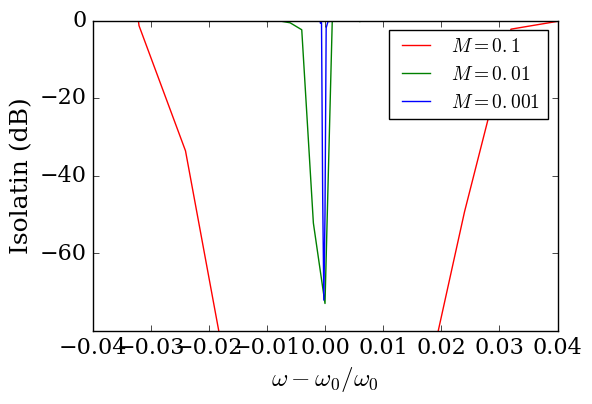

In [32]:
## bandwidth
w_i = 0.29394#0.259054
M_ratio = 0.001
Ns = [32]
lambda_g = 2.0*np.pi/(w_i*n)

N_wi = 11

M_ratio_arr = [0.1, 0.01, 0.001]
colors = ['r', 'g', 'b']
labels = [r'$M = 0.1$', r'$M = 0.01$', r'$M = 0.001$']
z1_arr = [100*lambda_g, 600*lambda_g, 6000*lambda_g]
d_w_arr = [0.04*w_i, 0.01*w_i, 0.001*w_i]
N_M_rat = len(M_ratio_arr)

R_abs = np.zeros((N_M_rat, N_wi))
T_abs = np.zeros((N_M_rat, N_wi))
w_i_arr = np.zeros((N_M_rat, N_wi))

for j in range(N_M_rat):
    global M_ratio
    global eig_points_k, eig_points_w, eig_vecs_E, eig_vecs_H, \
        eig_points_k_p, eig_points_w_p, eig_vecs_E_p, eig_vecs_H_p, \
        eig_points_k_m, eig_points_w_m, eig_vecs_E_m, eig_vecs_H_m, \
        eig_points_k_p_BZ, eig_points_k_m_BZ, eig_points_w_p_BZ, eig_points_w_m_BZ

    M_ratio = M_ratio_arr[j]
    d_w_i = d_w_arr[j]
    w_i_arr[j] = np.linspace(w_i-d_w_i, w_i+d_w_i, N_wi, endpoint=True)
    for i in range(N_wi):
        _w_i = w_i_arr[j, i]
        A_mat_list = set_matrices_list(_w_i, Ns)
        [eig_points_k, eig_points_w, eig_vecs_E, eig_vecs_H], \
        [eig_points_k_p, eig_points_w_p, eig_vecs_E_p, eig_vecs_H_p], \
        [eig_points_k_m, eig_points_w_m, eig_vecs_E_m, eig_vecs_H_m], \
        [eig_points_k_p_BZ, eig_points_k_m_BZ, eig_points_w_p_BZ, eig_points_w_m_BZ] = get_eig_points(_w_i, Ns, _N_pp=10, A_eqs_list=[A_mat_list], vbose=False)
        check_linear_dependence(vbose=False)

        x = solveSlab(Ns, _w_i, z_0=0.0, z_1=z1_arr[j])
        assert len(x)%4==0
        N_mode = int(len(x)/4)
        N_mode_2 = int(N_mode/2)

        x_R = x[0:N_mode]
        x_T = x[N_mode:2*N_mode]

        R_abs[j, i] = np.linalg.norm(x_R)
        T_abs[j, i] = np.linalg.norm(x_T)
        print('({}: w={:8.6f}, T={:6.4f})'.format(i, _w_i, T_abs[j, i]), end=' ')
    print('-'*50)

for j in range(N_M_rat):
    plot((w_i_arr[j]-w_i)/w_i, 20*np.log10(T_abs[j]), colors[j], label=labels[j], lw=1)
#xscale('log')
xlabel(r'$\omega-\omega_0/\omega_0$', fontsize=18)
ylabel(r'Isolatin (dB)', fontsize=18)
#xticks(np.arange(0, 30, 10))
yticks(np.arange(-60, 10, 20))
ylim([-80, 0])
legend(loc='best', fontsize=14)
savefig(os.path.join(dir_name, 'nondispersive-epsr-slab-bandwidth' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()


### FDTD

In [5]:
from Electromagnetics.FDTD import *
import numpy as np
import time

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'spacetime')
#file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)


n_dim = 1
r0, r1, dr = [None]*3
S = 0.9
n_t = None
save_every = 10
source_at_right = False

r_c = None
r0_eps, r1_eps = None, None
r0_deps, r1_deps = None, None
a_eps, b_eps = None, None
omega = 0.95 #2.0*np.pi
s_pml = None
d_pml = None
set_pml = True
is_t_var = True

n = 1.0
L_0 = 2.0*np.pi/(omega*n)

if n_dim==1:
    r0 = np.array([0.0])
    r1 = np.array([100.0*L_0])
    dr = np.array([L_0/100])
    S /= np.sqrt(1)
    n_t = 40000#2**18

    r_c = (r0+r1)/2.0
    a_eps, b_eps = n**2, n**2
    w_eps = (r1-r0)/2
    r0_eps = r_c - w_eps/2.0
    r1_eps = r_c + w_eps/2.0
    
    r0_deps = r0_eps
    r1_deps = r1_eps

    d_pml = np.array([0.5*L_0])
    s_pml = np.array([1.0+5.0j/L_0])
    
dt = S*dr[0]*np.sqrt(min(a_eps, b_eps))
d_v = np.prod(dr)


fdtd = FDTDSimulator()

fdtd.SetSimulationBox(r0, r1, dr, dt)
fdtd.save_every = save_every 

d_x_ = np.zeros(n_dim)
d_x_[0] = (r1[0]-r0[0])
d_x_pml = np.zeros(n_dim)
d_x_pml[0] = d_pml[0]

t0 = 10.0*2.0*np.pi/omega
f_t = lambda t: 2.0*np.cos(omega*t)*np.exp(-(t-t0)**2/(t0/4)**2)*(t<=t0) + 2.0*np.cos(omega*t)*(t>t0)

## J
r_j = r_c - d_x_*0.45 + set_pml*d_x_pml
je_mag = 1.0/dr[0]
src_dir = 'z'
je_args = None
je_type = FVTypes.JePoint
if source_at_right:
    r_j = r_c + d_x_*0.45 - set_pml*d_x_pml
je_args = {'r0':r_j, 'mag':je_mag, 'f_t':f_t, 'src_dir':src_dir}

fdtd.AddSources({'type':je_type, 'name':'Je', 'args':je_args})

## M
r_m = r_c - d_x_*0.45 + set_pml*d_x_pml
jm_mag = -1.0/dr[0]/np.sqrt(b_eps)
src_dir = 'y'
jm_args = None
jm_type = FVTypes.JmPoint
if source_at_right:
    r_m = r_c + d_x_*0.45 - set_pml*d_x_pml
    jm_mag *= -1.0
jm_args = {'r0':r_m, 'mag':jm_mag, 'f_t':f_t, 'src_dir':src_dir}
fdtd.AddSources({'type':jm_type, 'name':'Jm', 'args':jm_args})


eps_args = {'r0':r0_eps, 'r1':r1_eps, 'mag_in':a_eps, 'mag_out':b_eps}
fdtd.AddMaterial({'type':FVTypes.EpsIsoBox, 'name':'eps', 'args':eps_args})

deps = None
f_deps = None
deps_out = []
if is_t_var:
    del_eps = 0.1*n**2
    omega_m = -0.069798993405 #0.1*omega
    k_m = 1.99878165404 #1.9*omega*np.sqrt(a_eps)
    print('del_eps:', del_eps, 'omega_m:', omega_m, 'k_m:', k_m)
    a_deps = lambda r, t: del_eps*np.cos(omega_m*t - k_m*r[0])
    if n_dim==1:
        a_deps = lambda r, t: del_eps*np.cos(omega_m*t - k_m*r)
    deps_args = {'r0':r0_deps, 'r1':r1_deps, 'mag_in':a_deps, 'mag_out':0.0}
    fdtd.AddMaterial({'type':FVTypes.EpsIsoSTvarBox, 'name':'deps', 'args':deps_args})
    
if set_pml:
    pml_args = {'d_pml':d_pml, 's_pml':s_pml}
    fdtd.AddPML({'type':FVTypes.UPML, 'name':'pml', 'args':pml_args})

set_eps_out = True
set_j_out = False
set_T_1d = True
set_R_1d = True

r_R_1d = r_j - (r_j-d_pml)/2.0
r_T_1d = r1 - r_R_1d
if source_at_right:
    r_R_1d = r_j + (r1-d_pml-r_j)/2.0
    r_T_1d = r1 - r_R_1d
print('r0:', r0, 'r1:', r1)
print('r_T_1d:', r_T_1d, 'r_R_1d:', r_R_1d)

fdtd.AddViewPlane({'type':FVTypes.VPSide, 'r':r_j, 'args':{'A':'E', 'A_dir':'z', 'O_dir':None, 'name':'E'}})
if set_j_out:
    fdtd.AddViewPlane({'type':FVTypes.VPSide, 'r':r_j, 'args':{'A':'Je', 'A_dir':'z', 'O_dir':None, 'name':'J'}})
if n_dim==1 and set_T_1d:
    fdtd.AddViewPlane({'type':FVTypes.VPSide, 'r':r_T_1d, 'args':{'A':'E', 'A_dir':'z', 'O_dir':'x', 'name':'T'}})
if n_dim==1 and set_R_1d:
    fdtd.AddViewPlane({'type':FVTypes.VPSide, 'r':r_R_1d, 'args':{'A':'E', 'A_dir':'z', 'O_dir':'x', 'name':'R'}})
        
if is_t_var and set_eps_out:
    fdtd.AddViewPlane({'type':FVTypes.VPSide, 'r':r_j, 'args':{'A':'deps', 'A_dir':'x', 'O_dir':None, 'name':'Eps'}})


fdtd.StepFields(n_t)
n_saved = fdtd.n_saved
    

del_eps: 0.1 omega_m: -0.069798993405 k_m: 1.99878165404
r0: [ 0.] r1: [ 661.38792707]
r_T_1d: [ 641.54628926] r_R_1d: [ 19.84163781]


/home/nima/ipython workspace/Electromagnetics/FDTD.py:2239: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if c==None:
/home/nima/ipython workspace/Electromagnetics/FDTD.py:2199: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if c==None:
/home/nima/ipython workspace/Electromagnetics/FDTD.py:2219: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if b==None:


simulation time: 2:21


In [6]:
import matplotlib.pyplot as plt

r_E, E_out_list = fdtd.GetOutputs('E')
x_E, y_E, z_E = [None]*3
if n_dim==3:
    x_E, y_E, z_E = r_E
elif n_dim==2:
    x_E, y_E = r_E
elif n_dim==1:
    x_E = r_E[0]
e_max = [np.max(np.abs(e)) for e in E_out_list]
print('max(e_max):', max(e_max))
e_max = max(e_max)
    
x_J, y_J, z_J = [None]*3
j_max = None
J_out_list = None
if set_j_out:
    r_J, J_out_list = fdtd.GetOutputs('J')
    if n_dim==3:
        x_J, y_J, z_J = r_J
    elif n_dim==2:
        x_J, y_J = r_J
    elif n_dim==1:
        x_J = r_J[0]
    j_max = [np.max(np.abs(j)) for j in J_out_list]
    print('max(j_max):', max(j_max))
    j_max = max(j_max)



x_deps, y_deps, z_deps = [None]*3
deps_out_list = None
deps_max = None
if is_t_var and set_eps_out:
    r_deps, deps_out_list = fdtd.GetOutputs('Eps')
    if n_dim==3:
        x_deps, y_deps, z_deps = r_deps
    elif n_dim==2:
        x_deps, y_deps = r_deps
    elif n_dim==1:
        x_deps = r_deps[0]
    deps_max = [np.max(np.abs(de)) for de in deps_out_list]
    print('max(deps_max):', max(deps_max))
    deps_max = max(deps_max)


x_T = None
T_arr = None
if n_dim==1 and set_T_1d:
    r_T, T_out_list = fdtd.GetOutputs('T')
    x_T = r_T[0]
    T_arr = np.array([t[0] for t in T_out_list])
    T_max = np.max(np.abs(T_arr))
    print('max(T):', T_max)
    
x_R = None
R_arr = None
if n_dim==1 and set_R_1d:
    r_R, R_out_list = fdtd.GetOutputs('R')
    x_R = r_R[0]
    R_arr = np.array([t[0] for t in R_out_list])
    R_max = np.max(np.abs(R_arr))
    print('max(R):', R_max)
    
    
print(x_E.shape, E_out_list[0].shape)

import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams["figure.figsize"] = (5, 2)

np.savez(os.path.join(dir_name, 'nondispersive-epsr-slab-RT-FDTD'), T_arr=T_arr, R_arr=R_arr, dt=dt, omega=omega, omega_m=omega_m, k_m=k_m)



max(e_max): 4.19698401184
max(deps_max): 0.1
max(T): 0.660058216419
max(R): 2.1972218619
(10000,) (10000,)


In [7]:
%matplotlib tk

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib


# Set up formatting for the movie files
#Writer = animation.writers['mencoder']    ## avconv ffmpeg mencoder
#writer = Writer(fps=15, metadata=dict(artist='Me'))
#writer = animation.FFMpegWriter()

plt_field = 'E'
save_anim = False
file_format = 'gif'   ## 'gif' / 'mp4'

logscale=False
log_0 = np.log(e_max)-10

use_subplots = False

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 14}
matplotlib.rc('font', **font)

if set_T_1d:
    print('set_T_1d:', set_T_1d)
    f__0 = omega/(2.0*np.pi)
    d__f = omega_m/((2.0*np.pi))
    T_arr = T_arr[int(len(T_arr)/2):]
    plt.figure()
    plt.plot(T_arr)
    plt.show()
    T_fft = np.fft.fft(T_arr)
    T_fft = np.abs(T_fft)/len(T_fft)
    freq = np.fft.fftfreq(T_fft.shape[-1], dt)
    #plt.figure()
    #plt.plot(freq, T_fft)
    #plt.gca().set_xlim([f__0-10.0*d__f, f__0+10.0*d__f])
    #plt.gca().set_ylim([0, T_max])
    plt.show()
    plt.figure()
    plt.plot(freq, 20*np.log10(T_fft))
    #plt.gca().set_xlim([f__0-3.0*d__f, f__0+3.0*d__f])
    plt.gca().set_ylim([-80.0, 10.0])
    plt.show()

if set_R_1d:
    print('set_R_1d:', set_R_1d)
    f__0 = omega/(2.0*np.pi)
    d__f = omega_m/((2.0*np.pi))
    R_arr = R_arr[int(len(R_arr)/2):]
    plt.figure()
    plt.plot(R_arr)
    plt.show()
    R_fft = np.fft.fft(R_arr)
    R_fft = np.abs(R_fft)/len(R_fft)
    freq = np.fft.fftfreq(R_fft.shape[-1], dt)
    #plt.figure()
    #plt.plot(freq, R_fft)
    #plt.gca().set_xlim([f__0-10.0*d__f, f__0+10.0*d__f])
    #plt.gca().set_ylim([0, R_max])
    plt.show()
    plt.figure()
    plt.plot(freq, 20*np.log10(R_fft))
    #plt.gca().set_xlim([f__0-3.0*d__f, f__0+3.0*d__f])
    plt.gca().set_ylim([-80.0, 10.0])
    plt.show()

fig, axarr = None, None
def animate_E(i):
    #global fig
    if not is_t_var:
        plt.clf()
        fig = plt.plot(x_E, E_out_list[i])
        axes = plt.gca()
        axes.set_ylim([-e_max, e_max])
        return fig
    else:
        if not use_subplots:
            plt.clf()
            fig = None
            if plt_field=='E':
                fig = plt.plot(x_E, E_out_list[i])
                ax = plt.gca()
                ax.set_ylim([-e_max, e_max])
                ax.axes.get_xaxis().set_ticks([])
                ax.axes.get_yaxis().set_ticks([])
            elif plt_field=='Eps':
                fig = plt.plot(x_deps, deps_out_list[i], 'r')
                ax = plt.gca()
                ax.set_ylim([-deps_max, deps_max])
                ax.axes.get_xaxis().set_ticks([])
            #fig.set_tight_layout(True)
            ax = plt.gca()
            ax.set_adjustable('box-forced')
            plt.axvline(x=r0_deps[0], linewidth=1.0, linestyle='-.',color='r')
            plt.axvline(x=r1_deps[0], linewidth=1.0, linestyle='-.',color='r')
            return fig
        else:
            plt.clf()
            fig, axarr = plt.subplots(2, sharex=True)
            axarr[0].plot(x_E, E_out_list[i])
            axarr[0].set_ylim([-e_max, e_max])
            axarr[1].plot(x_deps, deps_out_list[i], 'r')
            axarr[1].set_ylim([-deps_max, deps_max])
            return fig


def animate_J(i):
    plt.clf()
    fig = plt.plot(x_J, J_out_list[i])
    axes = plt.gca()
    axes.set_ylim([-j_max, j_max])
    return fig

anim = None
if is_t_var and use_subplots:
    fig, axarr = plt.subplots(2, sharex=True)
else:
    fig = plt.figure()

if plt_field=='E' or plt_field=='Eps':
    anim = animation.FuncAnimation(fig, animate_E, frames=n_saved, interval=1)
elif plt_field=='J':
    anim = animation.FuncAnimation(fig, animate_J, frames=n_saved, interval=1)
else:
    raise ValuError()

if save_anim:
    if file_format=='gif':
        anim.save(os.path.join(dir_name, 'nondispersive-epsr-E1d-anim.gif'), writer="imagemagick", fps=15, dpi=200)
    elif file_format=='mp4':
        anim.save(os.path.join(dir_name, 'nondispersive-epsr-E1d-anim.mp4'), writer="mencoder", fps=15, dpi=200)
plt.show()
    

set_T_1d: True
set_R_1d: True


### FDTD and modal

Populating the interactive namespace from numpy and matplotlib
['T_arr', 'k_m', 'omega_m', 'R_arr', 'omega', 'dt']
['d_wc', 'd_k', 'w_i', 'x_T', 'w_scaled', 'x_R']


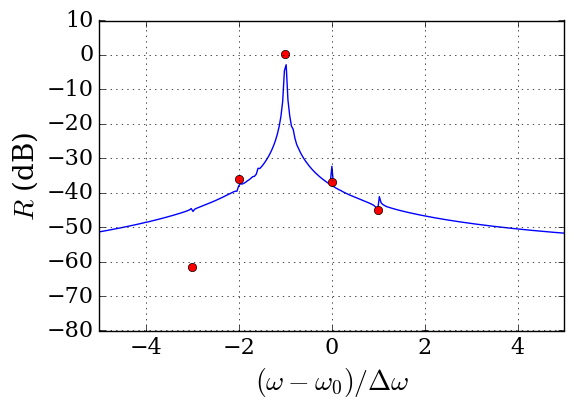

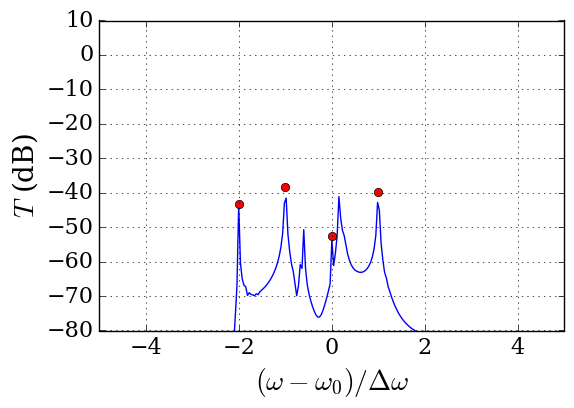

In [16]:
%pylab inline

import numpy as np

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'spacetime')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
    
font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

data_FDTD = np.load(os.path.join(dir_name, 'nondispersive-epsr-slab-RT-FDTD.npz'))
print(data_FDTD.files)

data_modal = np.load(os.path.join(dir_name, 'nondispersive-epsr-slab-RT.npz'))
print(data_modal.files)


x_R = data_modal['x_R']
x_T = data_modal['x_T']
w_scaled = data_modal['w_scaled']


R_arr = data_FDTD['R_arr']
T_arr = data_FDTD['T_arr']
dt = data_FDTD['dt']
R_arr = R_arr[int(len(R_arr)/2):]
T_arr = T_arr[int(len(T_arr)/2):]
R_fft = np.fft.fft(R_arr)/len(R_arr)
T_fft = np.fft.fft(T_arr)/len(T_arr)
w_fdtd = 2.0*np.pi*np.fft.fftfreq(R_fft.shape[-1], dt)
w0_fdtd = data_FDTD['omega']
w_m_fdtd = data_FDTD['omega_m']
w_scaled_fdtd = (w_fdtd - w0_fdtd)/w_m_fdtd

plot(w_scaled_fdtd, 20*np.log10(np.abs(R_fft)))
plot(w_scaled, 20*np.log10(np.abs(x_R)), 'ro')
xlim([-5, 5])
ylim([-80, 10])
xlabel(r'$(\omega-\omega_0)/\Delta\omega$', fontsize=20)
ylabel(r'$R$ (dB)', fontsize=20)
grid()
savefig(os.path.join(dir_name, 'nondispersive-epsr-slab-R-FDTD-modal-2' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()

plot(w_scaled_fdtd, 20*np.log10(np.abs(T_fft)))
plot(w_scaled, 20*np.log10(np.abs(x_T)), 'ro')
xlim([-5, 5])
ylim([-80, 10])
xlabel(r'$(\omega-\omega_0)/\Delta\omega$', fontsize=20)
ylabel(r'$T$ (dB)', fontsize=20)
grid()
savefig(os.path.join(dir_name, 'nondispersive-epsr-slab-T-FDTD-modal-2' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()


### Experiment

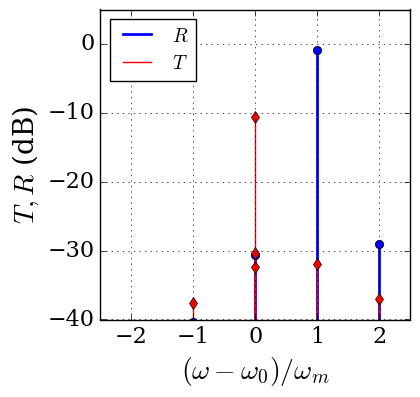

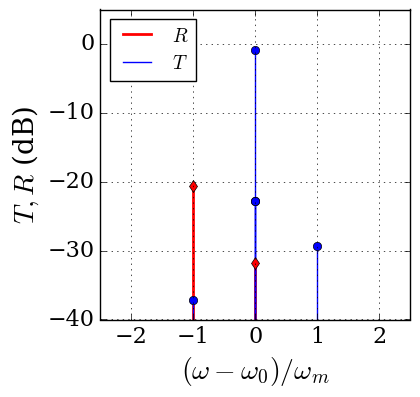

In [24]:
import numpy as np

figsize(4, 4)

Et_fwd_exp = np.loadtxt(os.path.join(dir_name, 'exp-fwd-T.txt'))
Er_fwd_exp = np.loadtxt(os.path.join(dir_name, 'exp-fwd-R.txt'))
Et_bwd_exp = np.loadtxt(os.path.join(dir_name, 'exp-bwd-T.txt'))
Er_bwd_exp = np.loadtxt(os.path.join(dir_name, 'exp-bwd-R.txt'))
#print(Et_fwd_exp.shape)
#print(Er_fwd_exp.shape)

f0 = 2.5e9
df = 0.27*f0
N = Et_fwd_exp.shape[0]

plot((Er_fwd_exp[:,0]-f0)/df, Er_fwd_exp[:,1], 'bo', lw=1)
vlines((Er_fwd_exp[:,0]-f0)/df, -100*np.ones(N), Er_fwd_exp[:,1], linewidth=2, color='b', label='$R$')
plot((Et_fwd_exp[:,0]-f0)/df, Et_fwd_exp[:,1], 'rd', lw=1)
vlines((Et_fwd_exp[:,0]-f0)/df, -100*np.ones(N), Et_fwd_exp[:,1], linewidth=1, color='r', label='$T$')

xlim([-2.5, 2.5])
yticks(np.arange(-80, 10, 10))
ylim([-40, 5])
xlabel(r'$(\omega-\omega_0)/\omega_m$', fontsize=20)
ylabel(r'$T, R$ (dB)', fontsize=20)
legend(loc='upper left', fontsize=14)
grid()

savefig(os.path.join(dir_name, 'exp-fwd-TR' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()

N = Et_bwd_exp.shape[0]

plot((Er_bwd_exp[:,0]-f0)/df, Er_bwd_exp[:,1], 'rd', lw=1)
vlines((Er_bwd_exp[:,0]-f0)/df, -100*np.ones(N), Er_bwd_exp[:,1], linewidth=2, color='r', label='$R$')
plot((Et_bwd_exp[:,0]-f0)/df, Et_bwd_exp[:,1], 'bo', lw=1)
vlines((Et_bwd_exp[:,0]-f0)/df, -100*np.ones(N), Et_bwd_exp[:,1], linewidth=1, color='b', label='$T$')

#plot(w_scaled+0.1, 20*np.log10(np.abs(x_R)), 'rd')
#plot(w_scaled+0.1, 20*np.log10(np.abs(x_T)), 'bo')
#vlines(w_scaled+0.1, -100*np.ones(N_mode), (20*np.log10(np.abs(x_R))), linewidth=2, color='r', linestyle='--')
#vlines(w_scaled+0.1, -100*np.ones(N_mode), (20*np.log10(np.abs(x_T))), linewidth=1, color='b', linestyle='--')

savefig(os.path.join(dir_name, 'exp-bwd-TR' + file_ext), bbox_inches='tight', pad_inches=0.2)
xlim([-2.5, 2.5])
yticks(np.arange(-80, 10, 10))
ylim([-40, 5])
xlabel(r'$(\omega-\omega_0)/\omega_m$', fontsize=20)
ylabel(r'$T, R$ (dB)', fontsize=20)
legend(loc='upper left', fontsize=14)
grid()

savefig(os.path.join(dir_name, 'exp-bwd-TR' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()


(31, 500)


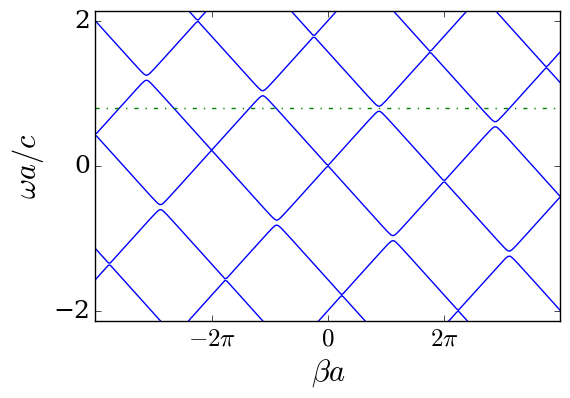

In [42]:
import numpy as np
from scipy import constants

figsize(6, 4)

dispersion_exp = np.loadtxt(os.path.join(dir_name, 'dispersion-st.txt'))

print(dispersion_exp.shape)

f0 = 2.5e9
f_m = 0.27*f0
omega_0 = 2.0*np.pi*f0
omega_m = 2.0*np.pi*f_m
k_m = 415.79

a = 2.0*np.pi/k_m
c = constants.c


for i in range(1, dispersion_exp.shape[0]):
    plot(dispersion_exp[0,:]*k_m*a, dispersion_exp[i,:]*omega_m*a/c, 'b')
axhline(omega_0*a/c, color='g', linestyle='-.')

xticks([-2*pi, 0, 2*pi], [r'$-2\pi$', r'$0$', r'$2\pi$'])
yticks(np.arange(-1, 2)*2)

xlim(-2*k_m*a, 2*k_m*a)
ylim(-10*omega_m*a/c, 10*omega_m*a/c)

ylabel(r'$\omega a/c$', fontsize=22)
xlabel(r'$\beta a$', fontsize=22)
#gca().set_aspect('equal', 'datalim')

savefig(os.path.join(dir_name, 'exp-disp' + file_ext), bbox_inches='tight', pad_inches=0.2)
